# FIA annotations and compound class classification

In [1]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA


In [2]:
!pip install pymzml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 10.1 MB/s eta 0:00:00 0:00:01


In [5]:
#checkout modules in pymzml:
!pip show pymzml

Name: pymzml
Version: 2.5.11
Summary: high-throughput mzML parsing
Home-page: http://pymzml.github.com
Author: M. Koesters, J. Leufken, S. Schulze, K. Sugimoto, R. Zahedi, M. Hippler and C. Fufezan
Author-email: christian@fufezan.net
License: The MIT license
Location: /Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages
Requires: numpy, regex
Required-by: 


In [9]:
! pip install molmass


In [10]:
import pandas as pd
from molmass import Formula

# Input/output files
input_csv = 'hmdb_mass_ontology.csv'
output_csv = 'hmdb_mass_ontology_filled.csv'

# Compute monoisotopic mass
def compute_monoisotopic_mass(formula_str):
    try:
        f = Formula(formula_str)
        return round(f.isotope.mass, 5)
    except:
        return None

# Check for missing/invalid values
def is_missing(val):
    return pd.isna(val) or str(val).strip().upper() in ('NA', '', 'NAN')

# Load CSV
df = pd.read_csv(input_csv)

# Fill in missing masses
missing_count = 0
for idx, row in df.iterrows():
    if is_missing(row['monoisotopic_molecular_weight']):
        formula = row['chemical_formula']
        if not is_missing(formula):
            mass = compute_monoisotopic_mass(formula)
            if mass:
                df.at[idx, 'monoisotopic_molecular_weight'] = mass
                missing_count += 1

# Save updated file
df.to_csv(output_csv, index=False)
print(f"Done: Filled {missing_count} missing masses.")
print(f"Saved to: {output_csv}")


Done: Filled 86795 missing masses.
Saved to: hmdb_mass_ontology_filled.csv


In [2]:
#import the hmdb_mass_ontology_filled.csv file:
masses = pd.read_csv('hmdb_mass_ontology_filled.csv')
masses

,accession,name,monoisotopic_molecular_weight,chemical_formula,kingdom,super_class,class,sub_class,molecular_framework
0,HMDB0000001,1-Methylhistidine,169.08513,C7H11N3O2,Organic compounds,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Aromatic heteromonocyclic compounds
1,HMDB0000002,"1,3-Diaminopropane",74.08440,C3H10N2,Organic compounds,Organic nitrogen compounds,Organonitrogen compounds,Amines,Aliphatic acyclic compounds
2,HMDB0000005,2-Ketobutyric acid,102.03169,C4H6O3,Organic compounds,Organic acids and derivatives,Keto acids and derivatives,Short-chain keto acids and derivatives,Aliphatic acyclic compounds
3,HMDB0000008,2-Hydroxybutyric acid,104.04734,C4H8O3,Organic compounds,Organic acids and derivatives,Hydroxy acids and derivatives,Alpha hydroxy acids and derivatives,Aliphatic acyclic compounds
4,HMDB0000010,2-Methoxyestrone,300.17254,C19H24O3,Organic compounds,Lipids and lipid-like molecules,Steroids and steroid derivatives,Estrane steroids,Aromatic homopolycyclic compounds
...,...,...,...,...,...,...,...,...,...
86810,HMDB0107553,TG(17:0/22:0/a-17:0)[rac],918.86154,C59H114O6,Organic compounds,Lipids and lipid-like molecules,Glycerolipids,Triradylcglycerols,Aliphatic acyclic compounds
86811,HMDB0107554,TG(17:0/i-22:0/18:0),932.87719,C60H116O6,Organic compounds,Lipids and lipid-like molecules,Glycerolipids,Triradylcglycerols,Aliphatic acyclic compounds
86812,HMDB0107555,TG(a-17:0/22:0/18:0)[rac],932.87719,C60H116O6,Organic compounds,Lipids and lipid-like molecules,Glycerolipids,Triradylcglycerols,Aliphatic acyclic compounds
86813,HMDB0107556,TG(a-17:0/22:0/i-18:0)[rac],932.87719,C60H116O6,Organic compounds,Lipids and lipid-like molecules,Glycerolipids,Triradylcglycerols,Aliphatic acyclic compounds


In [3]:
#import the file that needs annotation:
fia = pd.read_csv('20250520_fia_feature_table_no_nans.csv')
fia

,Unnamed: 0,M275.1469,M101.3082,M101.3289,M101.3866,M101.1397,M101.4131,M101.4016,M101.3213,M101.4429,...,M406.1193,M370.1392,M404.1033,M371.1358,M280.9969,M487.3036,M600.3885,M602.3878,M650.4282,M627.4082
0,366294_209-LP4-16S-0709,0.0000,3332.3496,2996.4395,1733.0049,0.0000,1712.1084,2154.3008,1668.1982,1382.2139,...,12665.3420,0.0000,26206.5550,4272.255,4399.6400,0.0000,2810.5913,1315.0000,3579.5230,2742.4746
1,366294_255-LP4-16S-0755,2102.3086,4728.7440,3892.5898,4936.0510,3437.5723,0.0000,3208.5450,3346.3748,2442.0586,...,8792.0860,7543.7370,12317.7970,27132.783,10296.9230,4364.6150,6170.3984,2862.5880,3707.4644,3940.0283
2,366294_237-LP4-16S-0737,0.0000,5141.7383,3473.3535,2335.4902,2146.5742,2759.1562,2624.6406,3602.1938,2923.3438,...,3239.8223,3626.8518,5069.8140,12351.266,6977.7790,0.0000,4428.0670,1800.0898,3916.0350,3563.0518
3,366294_198-LP4-16S-0698,0.0000,4768.5780,5265.4920,2333.1348,2483.0020,3256.9844,2219.1367,5265.4920,1920.4082,...,4562.4920,4705.7397,5184.6523,20862.570,7926.6680,3234.6484,5047.8564,2414.9297,3805.2210,3773.2903
4,366294_240-LP4-16S-0740,1545.6270,4286.2734,2374.1719,2331.8828,2527.1660,1571.8037,1591.0898,2236.5860,2154.5059,...,1514.1025,2544.0332,2434.1797,8762.167,5186.3564,1601.9404,3453.4531,0.0000,2454.6973,2758.9336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,366294_231-LP4-16S-0731,2470.6016,4856.3830,3134.3040,3251.8809,2501.8828,0.0000,1817.1738,0.0000,0.0000,...,0.0000,7514.5500,0.0000,28763.312,5856.3540,2152.1035,5894.7197,2599.0176,3971.2002,3367.1230
86,366294_196-LP4-16S-0696,2992.1660,6086.2095,2580.0352,4346.1445,4054.9766,2938.8945,1579.9150,0.0000,0.0000,...,1750.2705,13515.4120,1434.3945,56188.574,6194.7360,2425.6836,6227.3223,2804.0781,3794.7625,3416.2231
87,366294_245-LP4-16S-0745,2675.2344,3576.8790,2461.2500,2084.5215,2283.9140,0.0000,0.0000,2461.2500,2344.8027,...,0.0000,6154.8900,0.0000,21970.713,5906.2010,2399.9512,5547.2990,2360.8594,3809.3580,3155.3137
88,366294_252-LP4-16S-0752,3538.5093,3010.4082,3589.3398,2401.7246,2074.2246,2376.6270,2250.4883,3337.2500,4034.9863,...,2768.7754,14618.8880,2148.2130,59212.150,4032.1040,2221.4648,6270.7190,2977.2773,4450.5880,3614.6436


In [13]:
#extract all columns, make a long format:
# Extract all columns
all_columns = fia.columns.tolist()

#then make a new dataframe with the fia.columns, in the first one the actual column names, in the second column  
#remove the 'M':
# Create a new DataFrame with the column names
long_format_df = pd.DataFrame(all_columns, columns=['Column Name'])
# Remove the 'M' from the column names
long_format_df['mass'] = long_format_df['Column Name'].str.replace('M', '', regex=False)
long_format_df

,Column Name,mass
0,Unnamed: 0,Unnamed: 0
1,M275.1469,275.1469
2,M101.3082,101.3082
3,M101.3289,101.3289
4,M101.3866,101.3866
...,...,...
1093,M487.3036,487.3036
1094,M600.3885,600.3885
1095,M602.3878,602.3878
1096,M650.4282,650.4282


In [14]:
#drop row 1:
# Drop the first row
long_format_df = long_format_df.drop(index=0)
long_format_df

,Column Name,mass
1,M275.1469,275.1469
2,M101.3082,101.3082
3,M101.3289,101.3289
4,M101.3866,101.3866
5,M101.1397,101.1397
...,...,...
1093,M487.3036,487.3036
1094,M600.3885,600.3885
1095,M602.3878,602.3878
1096,M650.4282,650.4282


In [17]:
subclass_priority = {
    'Carbohydrates and carbohydrate conjugates': 1,
    'Short-chain keto acids': 2,
    'Amino acids, peptides, and analogues': 2,
    'Organic carbonic acids': 2,
    'Alcohols and polyols': 2,
    'Fatty acyl glycosides': 3,
    'Fatty acids and conjugates': 2,
    'Other': 3  # fallback for anything else
}


In [21]:
import pandas as pd

# Files
hmdb = masses.copy()  # your filled HMDB file
query = long_format_df.copy() # your file with experimental masses
output_file = '20250520_annotated_masses.csv'

# Parameters
mass_tolerance = 0.005  # Da

# Load data
# hmdb = pd.read_csv(hmdb_file)
# query = pd.read_csv(query_file)
subclass_priority = {
    'Carbohydrates and carbohydrate conjugates': 1,
    'Short-chain keto acids': 2,
    'Amino acids, peptides, and analogues': 2,
    'Organic carbonic acids': 2,
    'Alcohols and polyols': 2,
    'Fatty acyl glycosides': 3,
    'Fatty acids and conjugates': 2,
    'Other': 3  # fallback for anything else
}
default_priority = 3

# Load
# hmdb = pd.read_csv(hmdb_file)
# query = pd.read_csv(query_file)

hmdb['monoisotopic_molecular_weight'] = pd.to_numeric(hmdb['monoisotopic_molecular_weight'], errors='coerce')
query['mass'] = pd.to_numeric(query['mass'], errors='coerce')

# Annotate
results = []

for _, row in query.iterrows():
    obs_mass = row['mass']
    if pd.isna(obs_mass):
        results.append({**row, 'match_status': 'no mass'})
        continue

    # Find mass-matching candidates
    matched = hmdb[
        (hmdb['monoisotopic_molecular_weight'] >= obs_mass - mass_tolerance) &
        (hmdb['monoisotopic_molecular_weight'] <= obs_mass + mass_tolerance)
    ].copy()

    if not matched.empty:
        matched['delta'] = abs(matched['monoisotopic_molecular_weight'] - obs_mass)
        matched['priority'] = matched['sub_class'].apply(lambda x: subclass_priority.get(str(x), default_priority))
        
        best = matched.sort_values(['delta', 'priority']).iloc[0]
        tie_count = len(matched[matched['delta'] == matched['delta'].min()])

        annotated = {
            **row,
            'hmdb_accession': best['accession'],
            'hmdb_name': best['name'],
            'formula': best['chemical_formula'],
            'class': best['class'],
            'sub_class': best['sub_class'],
            'super_class': best['super_class'],
            'kingdom': best['kingdom'],
            'mass_diff': best['delta'],
            'match_status': 'matched',
            'tie_note': f'{tie_count} candidates'
        }
    else:
        annotated = {**row, 'match_status': 'no match'}

    results.append(annotated)

# Save result
annotated_df = pd.DataFrame(results)
annotated_df.to_csv(output_file, index=False)
print(f"Annotation complete. Output saved to: {output_file}")

Annotation complete. Output saved to: 20250520_annotated_masses.csv


In [19]:
#import and inspect:
annotated_df = pd.read_csv('20250520_annotated_masses.csv')
annotated_df

,Column Name,mass,hmdb_accession,hmdb_name,formula,class,sub_class,super_class,kingdom,mass_diff,match_status,tie_note
0,M275.1469,275.1469,HMDB0003869,epsilon-(gamma-Glutamyl)lysine,C11H21N3O5,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,0.00122,matched,4 candidates
1,M101.3082,101.3082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no match,NaN
2,M101.3289,101.3289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no match,NaN
3,M101.3866,101.3866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no match,NaN
4,M101.1397,101.1397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no match,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,M487.3036,487.3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no match,NaN
1093,M600.3885,600.3885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no match,NaN
1094,M602.3878,602.3878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no match,NaN
1095,M650.4282,650.4282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no match,NaN


In [20]:
annotated_df['match_status'].value_counts()

match_status
no match    869
matched     228
Name: count, dtype: int64

In [21]:
annotated_df['class'].value_counts()

class
Carboxylic acids and derivatives    36
Organooxygen compounds              24
Prenol lipids                       23
Steroids and steroid derivatives    15
Indoles and derivatives             11
                                    ..
Naphthalenes                         1
Thioacetals                          1
Benzoxepines                         1
Furofurans                           1
Depsides and depsidones              1
Name: count, Length: 73, dtype: int64

also import the cluster file:

In [24]:
cluster_df = pd.read_csv('20250516_fia_feature_table_z_filtered_significant_over_time_long_3clusters_features_per_cluster_annotated.csv')
cluster_df

,cluster,feature,weight,feature2,Unnamed: 1_x,kegg_mz_x,sample_mz_x,delta_mz_x,ppm_x,Exact.Mass_x,...,Unnamed: 1_y,kegg_mz_y,sample_mz_y,delta_mz_y,ppm_y,Exact.Mass_y,Compound_ID_y,Name_y,Chemical.Formula_y,plusF_y
0,1,M272.1614,272.161,M272.161,43.0,272.1619,272.161,0.0009,3.306855,273.1689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,M302.0994,302.099,M302.099,51.0,302.0997,302.099,0.0007,2.317116,303.1067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,M601.2658,601.266,M601.266,78.0,601.2673,601.266,0.0013,2.162100,602.2743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,M134.0459,134.046,M134.046,10.0,134.0462,134.046,0.0002,1.492023,135.0532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,M331.2071,331.207,M331.207,56.0,331.2082,331.207,0.0012,3.623099,332.2152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,1,M629.3289,629.329,M629.329,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,1,M615.3079,615.308,M615.308,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857,1,M559.2901,559.290,M559.290,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,1,M544.2744,544.274,M544.274,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#merge the cluster column from cluster_df (via 'feature') to the annotated_ds:
# Merge the cluster_df with annotated_df
merged_df = pd.merge(annotated_df, cluster_df[['feature', 'cluster', 'kegg_mz_x', 'sample_mz_x', 'delta_mz_x', 'ppm_x', 'Compound_ID_x', 'Name_x', 'Chemical.Formula_x']], left_on='Column Name', right_on='feature', how='left')
merged_df

,Column Name,mass,hmdb_accession,hmdb_name,formula,class,sub_class,super_class,kingdom,mass_diff,...,tie_note,feature,cluster,kegg_mz_x,sample_mz_x,delta_mz_x,ppm_x,Compound_ID_x,Name_x,Chemical.Formula_x
0,M275.1469,275.1469,HMDB0003869,epsilon-(gamma-Glutamyl)lysine,C11H21N3O5,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,0.00122,...,4 candidates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M101.3082,101.3082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M101.3289,101.3289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M101.3866,101.3866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M101.1397,101.1397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M101.1397,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,M487.3036,487.3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,M600.3885,600.3885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,M602.3878,602.3878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M602.3878,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,M650.4282,650.4282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M650.4282,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
merged_df['cluster'].value_counts()

cluster
1.0    454
0.0    281
2.0    125
Name: count, dtype: int64

In [27]:
#fill in NaNs in 'cluster' with '3':
# Fill NaN values in 'cluster' column with '3'
merged_df['cluster'] = merged_df['cluster'].fillna('3')
merged_df['cluster'].value_counts()

cluster
1.0    454
0.0    281
3      245
2.0    125
Name: count, dtype: int64

In [28]:
#split into individual dataframes for each cluster:
# Split the DataFrame into individual DataFrames for each cluster
cluster_dfs = {}
for cluster in merged_df['cluster'].unique():
    cluster_dfs[cluster] = merged_df[merged_df['cluster'] == cluster].copy()
    cluster_dfs[cluster].reset_index(drop=True, inplace=True)
    cluster_dfs[cluster].to_csv(f'20250521_cluster_{cluster}.csv', index=False)
    print(f"Cluster {cluster} DataFrame saved as cluster_{cluster}.csv")



Cluster 3 DataFrame saved as cluster_3.csv
Cluster 2.0 DataFrame saved as cluster_2.0.csv
Cluster 0.0 DataFrame saved as cluster_0.0.csv
Cluster 1.0 DataFrame saved as cluster_1.0.csv


In [29]:
#export also merged_df:
merged_df.to_csv('20250521_merged_all_cluster_annoations_and_onthology.csv', index=False)

In [34]:
#import mannually curated file:
curated = pd.read_csv('20250521_merged_all_cluster_annoations_and_onthology_hmdb_kegg_combined.csv')
curated

,Column Name,mass,hmdb_accession,hmdb_name,formula,sourdough_class,class,sub_class,super_class,kingdom,...,tie_note,feature,cluster,kegg_mz_x,sample_mz_x,delta_mz_x,ppm_x,Compound_ID_x,Name_x,Chemical.Formula_x
0,M272.1614,272.1614,NaN,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,...,NaN,M272.1614,1,272.1619,272.161,0.0009,3.306855,C20279,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4
1,M149.0443,149.0443,HMDB0029398,(3-Nitroamino)alanine,C3H7N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,1 candidates,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M134.0459,134.0459,NaN,4-Hydroxy-L-threonine,NaN,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,...,NaN,M134.0459,1,134.0462,134.046,0.0002,1.492023,"C03059, C06056","2-Hydroxymethylserine, 4-Hydroxy-L-threonine","C4H9NO4, C4H9NO4"
3,M128.0339,128.0339,HMDB0032916,"4-Oxoproline, 5-Oxoproline",C6H8OS,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,6 candidates,M128.0339,1,128.0356,128.034,0.0016,12.496524,"C01877, C01879, C02237, C04281, C04282, C22141","4-Oxoproline, 5-Oxoproline, 5-Oxo-D-proline, L...","C5H7NO3, C5H7NO3, C5H7NO3, C5H7NO3, C5H7N..."
4,M413.1845,413.1845,HMDB0030401,AK toxin I,C23H27NO6,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,1 candidates,M413.1845,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,M487.3036,487.3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,M600.3885,600.3885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,M602.3878,602.3878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M602.3878,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,M650.4282,650.4282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M650.4282,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
curated['sourdough_class'].value_counts()

sourdough_class
Amino acids, peptides, and analogues              55
Organoheterocyclic compounds                      46
Phenolic compounds                                38
Carbohydrates and carbohydrate conjugates         29
Prenol lipids                                     24
Other organic oxygen/nitrogen/sulfur compounds    19
Steroids and steroid derivatives                  18
Organic acids and derivatives                     13
Fatty acyls                                        9
Glycerolipids                                      8
Glycerophospholipids                               6
Nucleosides, nucleotides, and analogues            5
Name: count, dtype: int64

In [36]:
lang = curated.copy()

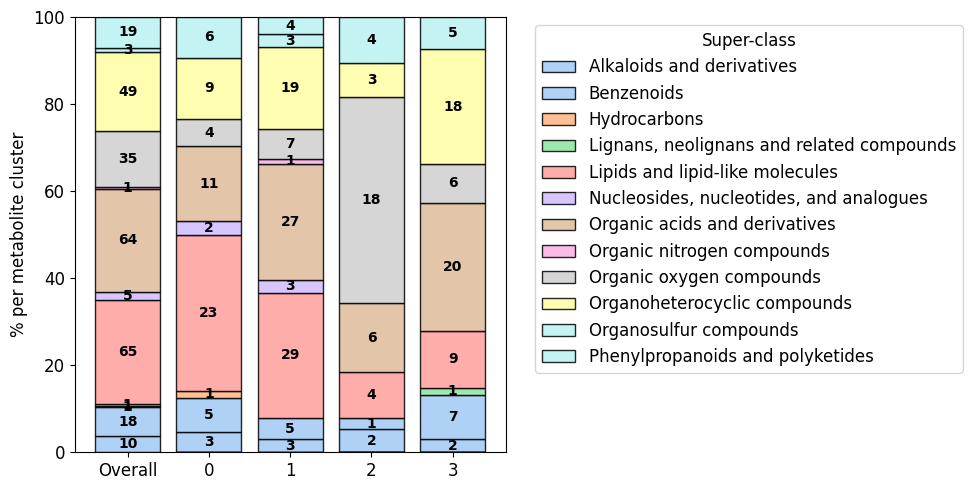

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
# Count occurrences
counts = lang.groupby(['cluster', 'super_class']).size().reset_index(name='count')

# Compute relative proportions per hub
counts['percent'] = counts.groupby('cluster')['count'].transform(lambda x: x / x.sum())

# Pivot to wide format: rows = hubs, columns = languages
wide_df = counts.pivot_table(index='cluster', columns='super_class', values='percent', fill_value=0)

# Scale to percent
wide_df_pct = wide_df * 100
# Compute total counts (across all hubs)
overall_counts = lang['super_class'].value_counts(normalize=True) * 100  # percent scale
# Convert to 1-row DataFrame with same columns as wide_df_pct
overall_df = pd.DataFrame([overall_counts], index=['Overall'])

# Reindex to match all language columns in wide_df_pct (fill missing with 0)
overall_df = overall_df.reindex(columns=wide_df_pct.columns, fill_value=0)
# Concatenate
wide_df_pct_with_total = pd.concat([overall_df, wide_df_pct])

# Optional: ensure index is clean (no accidental name carryover)
wide_df_pct_with_total.index.name = None


# Define plot size
fig_width = 10
fig_height = 5

#use viridis colormap without yellow:
# Truncate viridis to avoid yellow (keep lower 90%)
# def truncate_colormap(cmap_in='viridis', minval=0.0, maxval=0.8, n=256):
#     cmap = cm.get_cmap(cmap_in, n)
#     new_cmap = mcolors.LinearSegmentedColormap.from_list(
#         f'{cmap_in}_truncated',
#         cmap(np.linspace(minval, maxval, n))
#     )
#     return new_cmap

# # Create a truncated viridis (e.g., no top 10% — no yellow)
# truncated_viridis = truncate_colormap('viridis', 0.0, 0.8)

from pypalettes import load_cmap
cmap = load_cmap("pastel")  # Load the husl colormap with 8 colors

ax = wide_df_pct_with_total.plot(
    kind='bar',
    stacked=True,
    figsize=(fig_width, fig_height),
    colormap=cmap,
    edgecolor='black',
    width=0.8,
    alpha=0.85
)
# # Add white percentage labels inside each stacked bar segment
# for patch in ax.patches:
#     height = patch.get_height()
#     if height > 3:  # Optional: only label segments >3% to avoid clutter
#         x = patch.get_x() + patch.get_width() / 2
#         y = patch.get_y() + height / 2
#         ax.text(
#             x, y,
#             f'{height:.1f}%',
#             ha='center', va='center',
#             color='white',
#             fontsize=10,
#             fontweight='bold'
#         )
# Build raw counts pivot table
wide_df_counts = counts.pivot_table(
    index='cluster',
    columns='super_class',
    values='count',
    fill_value=0,
    aggfunc='sum'
)

# Add 'Overall' counts row
overall_abs_counts = lang['super_class'].value_counts().reindex(wide_df_counts.columns, fill_value=0)

# Ensure all values are integers
overall_abs_counts = overall_abs_counts.astype(int)
wide_df_counts = wide_df_counts.astype(int)

# Combine into one table
overall_df_counts = pd.DataFrame([overall_abs_counts], index=['Overall'])
wide_df_counts_with_total = pd.concat([overall_df_counts, wide_df_counts])
wide_df_counts_with_total.index.name = None

# Loop through hubs (bars) and languages (segments)
for hub_idx, hub_label in enumerate(wide_df_pct_with_total.index):
    for lang_idx, lang_label in enumerate(wide_df_pct_with_total.columns):
        percent = wide_df_pct_with_total.loc[hub_label, lang_label]
        count = wide_df_counts_with_total.loc[hub_label, lang_label]
        
        if percent > 0:
            # Get the bar's left x-position
            bar = ax.containers[hub_idx]
            x = hub_idx
            # Calculate vertical placement of the text (stacked height midpoint)
            bottom = wide_df_pct_with_total.loc[hub_label].iloc[:lang_idx].sum()
            y = bottom + percent / 2

            # Add count label
            ax.text(
                x,
                y,
                str(count),
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                fontweight='bold'
            )




# Customize
plt.ylabel('% per metabolite cluster', fontsize=12)
plt.xlabel('', fontsize=12)
plt.title('', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)  # ✅ Corrected!
plt.legend(title='Super-class', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)
# Make the "Overall" bar label bold or different color
xticks = ax.get_xticklabels()
# xticks[-6].set_fontweight("bold")


plt.tight_layout()
# Save the figure
#plt.savefig("Figures_pdfs/figure_home_exps/202500403_language_distributions.pdf", format="pdf", bbox_inches="tight")
plt.show()

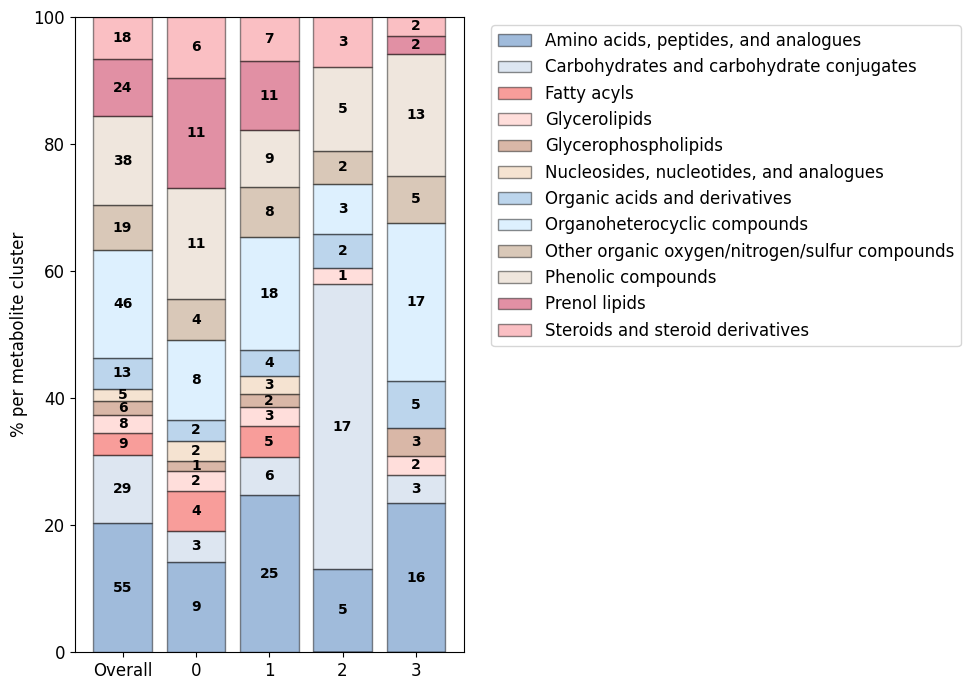

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
# Count occurrences
counts = lang.groupby(['cluster', 'sourdough_class']).size().reset_index(name='count')

# Compute relative proportions per hub
counts['percent'] = counts.groupby('cluster')['count'].transform(lambda x: x / x.sum())

# Pivot to wide format: rows = hubs, columns = languages
wide_df = counts.pivot_table(index='cluster', columns='sourdough_class', values='percent', fill_value=0)

# Scale to percent
wide_df_pct = wide_df * 100
# Compute total counts (across all hubs)
overall_counts = lang['sourdough_class'].value_counts(normalize=True) * 100  # percent scale
# Convert to 1-row DataFrame with same columns as wide_df_pct
overall_df = pd.DataFrame([overall_counts], index=['Overall'])

# Reindex to match all language columns in wide_df_pct (fill missing with 0)
overall_df = overall_df.reindex(columns=wide_df_pct.columns, fill_value=0)
# Concatenate
wide_df_pct_with_total = pd.concat([overall_df, wide_df_pct])

# Optional: ensure index is clean (no accidental name carryover)
wide_df_pct_with_total.index.name = None


# Define plot size
fig_width = 10
fig_height = 7

#use viridis colormap without yellow:
# Truncate viridis to avoid yellow (keep lower 90%)
# def truncate_colormap(cmap_in='viridis', minval=0.0, maxval=0.8, n=256):
#     cmap = cm.get_cmap(cmap_in, n)
#     new_cmap = mcolors.LinearSegmentedColormap.from_list(
#         f'{cmap_in}_truncated',
#         cmap(np.linspace(minval, maxval, n))
#     )
#     return new_cmap

# # Create a truncated viridis (e.g., no top 10% — no yellow)
# truncated_viridis = truncate_colormap('viridis', 0.0, 0.8)



#cmap = load_cmap("pastel1")  # Load the husl colormap with 8 colors
#colors = ['#855C75FF', '#D9AF6BFF', '#AF6458FF', '#736F4CFF', '#526A83FF', '#625377FF', '#68855CFF', '#9C9C5EFF', '#A06177FF', '#8C785DFF', '#467378FF', '#7C7C7CFF']
from pypalettes import load_cmap
cmap = load_cmap("Classic_Blue_Red_12")
ax = wide_df_pct_with_total.plot(
    kind='bar',
    stacked=True,
    figsize=(fig_width, fig_height),
    colormap=cmap,
    edgecolor='black',
    width=0.8,
    alpha=0.45
)
# # Add white percentage labels inside each stacked bar segment
# for patch in ax.patches:
#     height = patch.get_height()
#     if height > 3:  # Optional: only label segments >3% to avoid clutter
#         x = patch.get_x() + patch.get_width() / 2
#         y = patch.get_y() + height / 2
#         ax.text(
#             x, y,
#             f'{height:.1f}%',
#             ha='center', va='center',
#             color='white',
#             fontsize=10,
#             fontweight='bold'
#         )
# Build raw counts pivot table
wide_df_counts = counts.pivot_table(
    index='cluster',
    columns='sourdough_class',
    values='count',
    fill_value=0,
    aggfunc='sum'
)

# Add 'Overall' counts row
overall_abs_counts = lang['sourdough_class'].value_counts().reindex(wide_df_counts.columns, fill_value=0)

# Ensure all values are integers
overall_abs_counts = overall_abs_counts.astype(int)
wide_df_counts = wide_df_counts.astype(int)

# Combine into one table
overall_df_counts = pd.DataFrame([overall_abs_counts], index=['Overall'])
wide_df_counts_with_total = pd.concat([overall_df_counts, wide_df_counts])
wide_df_counts_with_total.index.name = None

# Loop through hubs (bars) and languages (segments)
for hub_idx, hub_label in enumerate(wide_df_pct_with_total.index):
    for lang_idx, lang_label in enumerate(wide_df_pct_with_total.columns):
        percent = wide_df_pct_with_total.loc[hub_label, lang_label]
        count = wide_df_counts_with_total.loc[hub_label, lang_label]
        
        if percent > 0:
            # Get the bar's left x-position
            bar = ax.containers[hub_idx]
            x = hub_idx
            # Calculate vertical placement of the text (stacked height midpoint)
            bottom = wide_df_pct_with_total.loc[hub_label].iloc[:lang_idx].sum()
            y = bottom + percent / 2

            # Add count label
            ax.text(
                x,
                y,
                str(count),
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                fontweight='bold'
            )




# Customize
plt.ylabel('% per metabolite cluster', fontsize=12)
plt.xlabel('', fontsize=12)
plt.title('', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)  # ✅ Corrected!
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)
# Make the "Overall" bar label bold or different color
xticks = ax.get_xticklabels()
# xticks[-6].set_fontweight("bold")


plt.tight_layout()
# Save the figure
plt.savefig("20250521_metabolite_distribution_acros_clusters.pdf", format="pdf", bbox_inches="tight")
plt.show()

# load feature table (tss) , collapse on sourdough_classes and calcualte enrichments and correlations

In [38]:
#import this file: 20250516_fia_feature_table_tss:
tss = pd.read_csv('20250516_fia_feature_table_tss.csv', index_col=0)
tss

,M275.1469,M101.3082,M101.3289,M101.3866,M101.1397,M101.4131,M101.4016,M101.3213,M101.4429,M101.2945,...,M406.1193,M370.1392,M404.1033,M371.1358,M280.9969,M487.3036,M600.3885,M602.3878,M650.4282,M627.4082
366294_209-LP4-16S-0709,0.000000,0.001073,0.000965,0.000558,0.000000,0.000551,0.000694,0.000537,0.000445,0.000892,...,0.004077,0.000000,0.008436,0.001375,0.001416,0.000000,0.000905,0.000423,0.001152,0.000883
366294_255-LP4-16S-0755,0.000511,0.001150,0.000946,0.001200,0.000836,0.000000,0.000780,0.000814,0.000594,0.001174,...,0.002138,0.001834,0.002995,0.006597,0.002504,0.001061,0.001500,0.000696,0.000901,0.000958
366294_237-LP4-16S-0737,0.000000,0.001709,0.001154,0.000776,0.000713,0.000917,0.000872,0.001197,0.000972,0.001560,...,0.001077,0.001205,0.001685,0.004105,0.002319,0.000000,0.001472,0.000598,0.001301,0.001184
366294_198-LP4-16S-0698,0.000000,0.001667,0.001841,0.000816,0.000868,0.001139,0.000776,0.001841,0.000671,0.001164,...,0.001595,0.001645,0.001813,0.007294,0.002771,0.001131,0.001765,0.000844,0.001330,0.001319
366294_240-LP4-16S-0740,0.000785,0.002176,0.001206,0.001184,0.001283,0.000798,0.000808,0.001136,0.001094,0.001648,...,0.000769,0.001292,0.001236,0.004449,0.002634,0.000813,0.001754,0.000000,0.001246,0.001401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_231-LP4-16S-0731,0.000391,0.000769,0.000496,0.000515,0.000396,0.000000,0.000288,0.000000,0.000000,0.000000,...,0.000000,0.001190,0.000000,0.004555,0.000927,0.000341,0.000933,0.000412,0.000629,0.000533
366294_196-LP4-16S-0696,0.000320,0.000650,0.000275,0.000464,0.000433,0.000314,0.000169,0.000000,0.000000,0.000306,...,0.000187,0.001443,0.000153,0.006000,0.000661,0.000259,0.000665,0.000299,0.000405,0.000365
366294_245-LP4-16S-0745,0.000403,0.000539,0.000371,0.000314,0.000344,0.000000,0.000000,0.000371,0.000353,0.000334,...,0.000000,0.000927,0.000000,0.003308,0.000889,0.000361,0.000835,0.000355,0.000574,0.000475
366294_252-LP4-16S-0752,0.000252,0.000215,0.000256,0.000171,0.000148,0.000169,0.000160,0.000238,0.000288,0.000269,...,0.000197,0.001042,0.000153,0.004220,0.000287,0.000158,0.000447,0.000212,0.000317,0.000258


In [39]:
lang

,Column Name,mass,hmdb_accession,hmdb_name,formula,sourdough_class,class,sub_class,super_class,kingdom,...,tie_note,feature,cluster,kegg_mz_x,sample_mz_x,delta_mz_x,ppm_x,Compound_ID_x,Name_x,Chemical.Formula_x
0,M272.1614,272.1614,NaN,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,...,NaN,M272.1614,1,272.1619,272.161,0.0009,3.306855,C20279,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4
1,M149.0443,149.0443,HMDB0029398,(3-Nitroamino)alanine,C3H7N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,1 candidates,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M134.0459,134.0459,NaN,4-Hydroxy-L-threonine,NaN,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,...,NaN,M134.0459,1,134.0462,134.046,0.0002,1.492023,"C03059, C06056","2-Hydroxymethylserine, 4-Hydroxy-L-threonine","C4H9NO4, C4H9NO4"
3,M128.0339,128.0339,HMDB0032916,"4-Oxoproline, 5-Oxoproline",C6H8OS,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,6 candidates,M128.0339,1,128.0356,128.034,0.0016,12.496524,"C01877, C01879, C02237, C04281, C04282, C22141","4-Oxoproline, 5-Oxoproline, 5-Oxo-D-proline, L...","C5H7NO3, C5H7NO3, C5H7NO3, C5H7NO3, C5H7N..."
4,M413.1845,413.1845,HMDB0030401,AK toxin I,C23H27NO6,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,1 candidates,M413.1845,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,M487.3036,487.3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,M600.3885,600.3885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,M602.3878,602.3878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M602.3878,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,M650.4282,650.4282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M650.4282,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#import cluster files 20250521_cluster_0.0.csv, 20250521_cluster_1.0.csv, 20250521_cluster_2.0.csv, 20250521_cluster_3.csv:
cluster_0 = pd.read_csv('20250521_cluster_0.0.csv')
cluster_1 = pd.read_csv('20250521_cluster_1.0.csv')
cluster_2 = pd.read_csv('20250521_cluster_2.0.csv')
cluster_3 = pd.read_csv('20250521_cluster_3.csv')
cluster_0

,Column Name,mass,hmdb_accession,hmdb_name,formula,class,sub_class,super_class,kingdom,mass_diff,...,tie_note,feature,cluster,kegg_mz_x,sample_mz_x,delta_mz_x,ppm_x,Compound_ID_x,Name_x,Chemical.Formula_x
0,M1065.3544,1065.3544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M1065.3544,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M303.1798,303.1798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M303.1798,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M1090.4999,1090.4999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M1090.4999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M1072.182,1072.1820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M1072.182,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M932.1873,932.1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M932.1873,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,M570.327,570.3270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M570.327,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,M373.1453,373.1453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M373.1453,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,M387.0952,387.0952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M387.0952,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,M602.3878,602.3878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M602.3878,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
cluster_3 = cluster_3[cluster_3['Column Name'] != 'M677.4975']


In [47]:
# Ensure feature names are strings and align properly
selected_features_cl0 = cluster_0['Column Name'].astype(str).unique()

# Subset the feature table to only include rows with matching feature names
tss_subset_0 = tss[selected_features_cl0]
tss_subset_0

# Ensure feature names are strings and align properly
selected_features_cl1 = cluster_1['Column Name'].astype(str).unique()

# Subset the feature table to only include rows with matching feature names
tss_subset_1 = tss[selected_features_cl1]
tss_subset_1

# Ensure feature names are strings and align properly
selected_features_cl2 = cluster_2['Column Name'].astype(str).unique()

# Subset the feature table to only include rows with matching feature names
tss_subset_2 = tss[selected_features_cl2]
tss_subset_2
# Ensure feature names are strings and align properly
selected_features_cl3 = cluster_3['Column Name'].astype(str).unique()

# Subset the feature table to only include rows with matching feature names
tss_subset_3 = tss[selected_features_cl3]
tss_subset_3



,M275.1469,M101.3082,M101.3289,M101.3866,M101.4131,M101.3213,M101.4429,M101.2945,M101.2365,M101.2471,...,M366.1098,M369.12,M407.1171,M379.1009,M406.1193,M370.1392,M404.1033,M371.1358,M487.3036,M600.3885
366294_209-LP4-16S-0709,0.000000,0.001073,0.000965,0.000558,0.000551,0.000537,0.000445,0.000892,0.000818,0.000957,...,0.001370,0.000000,0.015818,0.000000,0.004077,0.000000,0.008436,0.001375,0.000000,0.000905
366294_255-LP4-16S-0755,0.000511,0.001150,0.000946,0.001200,0.000000,0.000814,0.000594,0.001174,0.000744,0.000931,...,0.000769,0.001463,0.004616,0.001357,0.002138,0.001834,0.002995,0.006597,0.001061,0.001500
366294_237-LP4-16S-0737,0.000000,0.001709,0.001154,0.000776,0.000917,0.001197,0.000972,0.001560,0.001355,0.001426,...,0.000000,0.000970,0.002429,0.000995,0.001077,0.001205,0.001685,0.004105,0.000000,0.001472
366294_198-LP4-16S-0698,0.000000,0.001667,0.001841,0.000816,0.001139,0.001841,0.000671,0.001164,0.001886,0.001347,...,0.000000,0.001469,0.002700,0.001459,0.001595,0.001645,0.001813,0.007294,0.001131,0.001765
366294_240-LP4-16S-0740,0.000785,0.002176,0.001206,0.001184,0.000798,0.001136,0.001094,0.001648,0.000956,0.001670,...,0.000000,0.001014,0.001448,0.000854,0.000769,0.001292,0.001236,0.004449,0.000813,0.001754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_231-LP4-16S-0731,0.000391,0.000769,0.000496,0.000515,0.000000,0.000000,0.000000,0.000000,0.000580,0.000652,...,0.000000,0.000557,0.000000,0.000485,0.000000,0.001190,0.000000,0.004555,0.000341,0.000933
366294_196-LP4-16S-0696,0.000320,0.000650,0.000275,0.000464,0.000314,0.000000,0.000000,0.000306,0.000523,0.000349,...,0.000000,0.000375,0.000000,0.000579,0.000187,0.001443,0.000153,0.006000,0.000259,0.000665
366294_245-LP4-16S-0745,0.000403,0.000539,0.000371,0.000314,0.000000,0.000371,0.000353,0.000334,0.000000,0.000000,...,0.000000,0.000537,0.000000,0.000503,0.000000,0.000927,0.000000,0.003308,0.000361,0.000835
366294_252-LP4-16S-0752,0.000252,0.000215,0.000256,0.000171,0.000169,0.000238,0.000288,0.000269,0.000248,0.000254,...,0.000000,0.000265,0.000000,0.000397,0.000197,0.001042,0.000153,0.004220,0.000158,0.000447


In [77]:
#for each of the tss_subsets, rename the column names based on 'sourdough_class' in the lang dataframe:
# Create a mapping from 'Column Name' to 'sourdough_class'
mapping = dict(zip(lang['Column Name'], lang['sourdough_class']))
# Rename the columns in each subset DataFrame
tss_subset_0.rename(columns=mapping, inplace=True)
tss_subset_0

#then collapse the columns so that all values from columns with the same name are summed:
# Collapse the columns by summing the values
tss_subset_0_collapsed = tss_subset_0.groupby(tss_subset_0.columns, axis=1).sum()
tss_subset_0_collapsed

#do the same for all tss subsets:
# Collapse the columns by summing the values
tss_subset_1.rename(columns=mapping, inplace=True)
tss_subset_1_collapsed = tss_subset_1.groupby(tss_subset_1.columns, axis=1).sum()
tss_subset_1_collapsed

# Collapse the columns by summing the values
tss_subset_2.rename(columns=mapping, inplace=True)
tss_subset_2_collapsed = tss_subset_2.groupby(tss_subset_2.columns, axis=1).sum()
tss_subset_2_collapsed

# Collapse the columns by summing the values
tss_subset_3.rename(columns=mapping, inplace=True)
tss_subset_3_collapsed = tss_subset_3.groupby(tss_subset_3.columns, axis=1).sum()
tss_subset_3_collapsed

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/956793453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tss_subset_0.rename(columns=mapping, inplace=True)
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/956793453.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  tss_subset_0_collapsed = tss_subset_0.groupby(tss_subset_0.columns, axis=1).sum()
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/956793453.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tss_subset_1.rename(columns=mapping, inplace=T

,"Amino acids, peptides, and analogues",Carbohydrates and carbohydrate conjugates,Glycerolipids,Glycerophospholipids,Organic acids and derivatives,Organoheterocyclic compounds,Other organic oxygen/nitrogen/sulfur compounds,Phenolic compounds,Prenol lipids,Steroids and steroid derivatives
366294_209-LP4-16S-0709,0.092896,0.007836,0.001375,0.005827,0.001798,0.013183,0.002150,0.021138,0.000000,0.000616
366294_255-LP4-16S-0755,0.135062,0.004403,0.006597,0.002223,0.003916,0.039602,0.005142,0.024156,0.000839,0.002393
366294_237-LP4-16S-0737,0.142106,0.004802,0.004105,0.001731,0.005081,0.040176,0.005514,0.022951,0.001387,0.001599
366294_198-LP4-16S-0698,0.142385,0.003122,0.007294,0.001346,0.003743,0.038302,0.004925,0.022780,0.001738,0.001766
366294_240-LP4-16S-0740,0.144683,0.003662,0.004449,0.001296,0.004600,0.027127,0.004738,0.022682,0.001659,0.000000
...,...,...,...,...,...,...,...,...,...,...
366294_231-LP4-16S-0731,0.078155,0.001570,0.004998,0.000878,0.002067,0.017806,0.002699,0.011567,0.000862,0.000816
366294_196-LP4-16S-0696,0.073404,0.001048,0.006428,0.000356,0.002522,0.019424,0.002578,0.010578,0.000000,0.000000
366294_245-LP4-16S-0745,0.066791,0.001082,0.003753,0.000854,0.002013,0.015002,0.002097,0.009575,0.000981,0.000000
366294_252-LP4-16S-0752,0.047855,0.000635,0.004708,0.000220,0.002161,0.013814,0.001804,0.008477,0.001028,0.000253


In [78]:
#import 20250515_fia_16S_ITS_shipping_general_metadata:
metadata = pd.read_csv('20250515_fia_16S_ITS_shipping_general_metadata.csv', index_col=0)
metadata.columns.to_list()

['Unnamed: 0',
 'Chao1 kmers ITS',
 'Chao1 OTUs ITS',
 'Chao1 ASVs ITS',
 'Chao1 kmers',
 'Chao1 OTUs',
 'Chao1 ASVs',
 'identifier',
 'row',
 'column',
 'temperature',
 'day',
 'phase',
 'phase2',
 'temp-phase',
 'temp-phase2',
 'replicate',
 'well',
 'DNA yield',
 'DNA_total_yield_per_1g',
 'pH',
 'TTA',
 'estimate_bact',
 'estimate_bact_CFUs',
 'LAB CFUs',
 'LAB_counts',
 'bac_diff',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'Observed features ASVs',
 'Observed features OTUs',
 'Observed features kmers',
 'Shannon ASVs',
 'Evenness ASVs',
 'Simpson ASVs',
 'Shannon OTUs',
 'Evenness OTUs',
 'Simpson OTUs',
 'Shannon kmers',
 'Evenness kmers',
 'Simpson kmers',
 'color',
 'color2',
 'Observed features ASVs ITS',
 'Observed features OTUs ITS',
 'Observed features kmers ITS',
 'Shannon ASVs ITS',
 'Evenness ASVs ITS',
 'Simpson ASVs ITS',
 'Shannon OTUs ITS',
 'Evenness OTUs ITS',
 'Simpso

In [79]:
#merge to each collapsed subset the column 'temp-phase2' from the metadata:
# Merge the metadata with the collapsed DataFrame
tss_subset_0_collapsed = tss_subset_0_collapsed.merge(metadata[['temp-phase2']], left_index=True, right_index=True)
print(tss_subset_0_collapsed['temp-phase2'].dtype)
print(tss_subset_0_collapsed['temp-phase2'].unique())

#drop the sample with tehmp-phase2 = 20:
tss_subset_0_collapsed = tss_subset_0_collapsed[tss_subset_0_collapsed['temp-phase2'] != 20.0]
tss_subset_0_collapsed

#convert temp-phase2 to string:
tss_subset_0_collapsed['temp-phase2'] = tss_subset_0_collapsed['temp-phase2'].astype(str)

#do the same for all tss subsets:
# Merge the metadata with the collapsed DataFrame
tss_subset_1_collapsed = tss_subset_1_collapsed.merge(metadata[['temp-phase2']], left_index=True, right_index=True)
print(tss_subset_1_collapsed['temp-phase2'].dtype)
print(tss_subset_1_collapsed['temp-phase2'].unique())
#drop the sample with tehmp-phase2 = 20:
tss_subset_1_collapsed = tss_subset_1_collapsed[tss_subset_1_collapsed['temp-phase2'] != 20.0]
tss_subset_1_collapsed
#convert temp-phase2 to string:
tss_subset_1_collapsed['temp-phase2'] = tss_subset_1_collapsed['temp-phase2'].astype(str)
# Merge the metadata with the collapsed DataFrame
tss_subset_2_collapsed = tss_subset_2_collapsed.merge(metadata[['temp-phase2']], left_index=True, right_index=True)
print(tss_subset_2_collapsed['temp-phase2'].dtype)
print(tss_subset_2_collapsed['temp-phase2'].unique())
#drop the sample with tehmp-phase2 = 20:
tss_subset_2_collapsed = tss_subset_2_collapsed[tss_subset_2_collapsed['temp-phase2'] != 20.0]
tss_subset_2_collapsed
#convert temp-phase2 to string:
tss_subset_2_collapsed['temp-phase2'] = tss_subset_2_collapsed['temp-phase2'].astype(str)
# Merge the metadata with the collapsed DataFrame
tss_subset_3_collapsed = tss_subset_3_collapsed.merge(metadata[['temp-phase2']], left_index=True, right_index=True)
print(tss_subset_3_collapsed['temp-phase2'].dtype)
print(tss_subset_3_collapsed['temp-phase2'].unique())
#drop the sample with tehmp-phase2 = 20:
tss_subset_3_collapsed = tss_subset_3_collapsed[tss_subset_3_collapsed['temp-phase2'] != 20.0]
tss_subset_3_collapsed
#convert temp-phase2 to string:
tss_subset_3_collapsed['temp-phase2'] = tss_subset_3_collapsed['temp-phase2'].astype(str)




float64
[20.   4.1  4.2  4.3 17.1 17.2 17.3 30.1 30.2 30.3]
float64
[20.   4.1  4.2  4.3 17.1 17.2 17.3 30.1 30.2 30.3]
float64
[20.   4.1  4.2  4.3 17.1 17.2 17.3 30.1 30.2 30.3]
float64
[20.   4.1  4.2  4.3 17.1 17.2 17.3 30.1 30.2 30.3]


In [80]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

def test_numeric_enrichment(df, cluster_column='cluster', p_value_threshold=0.05):
    """
    Performs Mann-Whitney U test for each feature-cluster pair and calculates enrichment score.

    Parameters:
    - df: DataFrame containing numeric data and cluster labels.
    - cluster_column: Column name containing the cluster labels.
    - p_value_threshold: Significance threshold.

    Returns:
    - enriched_df: DataFrame containing statistics, p-values, enrichment scores, and interpretations.
    """
    results = []
    cluster_labels = df[cluster_column].unique()

    for col in df.columns:
        if col == cluster_column:
            continue

        for cluster in cluster_labels:
            # Separate data for the current cluster vs other clusters
            target_data = df[col][df[cluster_column] == cluster].dropna()
            other_data = df[col][df[cluster_column] != cluster].dropna()

            # Skip if there is insufficient data
            if len(target_data) <= 1 or len(other_data) <= 1:
                continue

            # Perform Mann-Whitney U test
            stat, p_value = mannwhitneyu(target_data, other_data, alternative='two-sided')

            # Calculate mean values for enrichment score
            cluster_mean = np.mean(target_data)
            other_mean = np.mean(other_data)
            overall_mean = np.mean(df[col].dropna())

            # Calculate enrichment score
            enrichment_score = ((cluster_mean + 1e-4) / (overall_mean + 1e-4)) if overall_mean != 0 else np.nan

            #normalized enrichment score (log2):
            enrichment_score_norm = np.log2(enrichment_score)

            # Interpret enrichment score
            interpretation = 'Positive Enrichment' if enrichment_score > 1 else 'Negative Enrichment'

            results.append({
                'Feature': col,
                'Cluster': cluster,
                'Statistic': stat,
                'Raw p-value': p_value,
                'Corrected p-value': np.nan,  # Placeholder
                'Cluster Mean': cluster_mean,
                'Overall Mean': overall_mean,
                'Enrichment Score': enrichment_score,
                'Normalized Enrichment Score': enrichment_score_norm,
                'Interpretation': interpretation
            })

    # Correct for multiple comparisons
    p_vals = [res['Raw p-value'] for res in results if not np.isnan(res['Raw p-value'])]
    if p_vals:
        _, corrected_p_vals, _, _ = multipletests(p_vals, method='fdr_bh')
        idx = 0
        for res in results:
            if not np.isnan(res['Raw p-value']):
                res['Corrected p-value'] = corrected_p_vals[idx]
                idx += 1

    enriched_df = pd.DataFrame(results)

    # Assign indicator type (Unique/Multiple) for significant features
    enriched_df['Indicator'] = 'None'
    for feature in enriched_df['Feature'].unique():
        significant_clusters = enriched_df[
            #choose here if corrected or uncorrected p value should be chosen!
            (enriched_df['Feature'] == feature) & (enriched_df['Raw p-value'] < p_value_threshold)
        ]['Cluster'].unique()

        if len(significant_clusters) == 1:
            enriched_df.loc[enriched_df['Feature'] == feature, 'Indicator'] = 'Unique'
        elif len(significant_clusters) > 1:
            enriched_df.loc[enriched_df['Feature'] == feature, 'Indicator'] = 'Multiple'

    # Filter only significant enrichments, also here choose if corrected or uncorrected p value should be chosen!
    #significant_enriched_df = enriched_df[enriched_df['Raw p-value'] < p_value_threshold]
    significant_enriched_df = enriched_df.copy()

    return significant_enriched_df

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

def plot_numeric_bubbles_with_annotations(df, title, cluster_order=None, feature_order=None):
    """
    Plot a heatmap-like dot plot for numerical feature enrichments, maintaining the same visual style as the categorical version.
    
    Parameters:
    - df: DataFrame containing numerical enrichment results.
    - title: Title of the plot.
    - cluster_order: List specifying manual order of clusters (y-axis).
    - feature_order: List specifying manual order of features (x-axis).
    
    Returns:
    - fig: The matplotlib figure object.
    """
    # Ensure no missing values in necessary columns
    df = df.dropna(subset=['Cluster', 'Feature', 'Normalized Enrichment Score', 'Interpretation'])

    # Pivot the data for plotting
    plot_data = df.pivot_table(index="Cluster", columns="Feature", values="Indicator", aggfunc=lambda x: x.iloc[0]).fillna("None")
    raw_p_values = df.pivot_table(index="Cluster", columns="Feature", values="Raw p-value", aggfunc=lambda x: x.iloc[0])
    corrected_p_values = df.pivot_table(index="Cluster", columns="Feature", values="Corrected p-value", aggfunc=lambda x: x.iloc[0])
    enrichment_scores = df.pivot_table(index="Cluster", columns="Feature", values="Enrichment Score", aggfunc=lambda x: x.iloc[0]).fillna(0)
    norm_enrichment_scores = df.pivot_table(index="Cluster", columns="Feature", values="Normalized Enrichment Score", aggfunc=lambda x: x.iloc[0]).fillna(0)

    # Apply manual reordering if specified
    if cluster_order:
        plot_data = plot_data.reindex(cluster_order)
        raw_p_values = raw_p_values.reindex(cluster_order)
        corrected_p_values = corrected_p_values.reindex(cluster_order)
        enrichment_scores = enrichment_scores.reindex(cluster_order)
        norm_enrichment_scores = norm_enrichment_scores.reindex(cluster_order)

    if feature_order:
        plot_data = plot_data.reindex(columns=feature_order)
        raw_p_values = raw_p_values.reindex(columns=feature_order)
        corrected_p_values = corrected_p_values.reindex(columns=feature_order)
        enrichment_scores = enrichment_scores.reindex(columns=feature_order)
        norm_enrichment_scores = norm_enrichment_scores.reindex(columns=feature_order)

    # Normalize enrichment scores for dot sizes
    enrichment_max = norm_enrichment_scores.abs().max().max()
    size_scale = lambda x: 10 + (abs(x) / enrichment_max) * 1000 if enrichment_max > 0 else 10

    # Define colors for enrichment interpretation
    color_map = {
        'Positive Enrichment': "#CB6BCEFF",  # Purple for positive
        'Negative Enrichment': "#345084FF"   # Blue for negative
    }

    # Create the figure
    fig = plt.figure(figsize=(10, 7))
    grid = fig.add_gridspec(3, 3, width_ratios=[0.15, 0.7, 0.05], height_ratios=[0.35, 1, 0.05])

    # Heatmap with dots
    ax_heatmap = fig.add_subplot(grid[1, 1])
    ax_heatmap.grid(True, which='major', color='grey', linestyle='-', linewidth=0.2)
    ax_heatmap.set_axisbelow(True)  # Place grid lines below the dots

    # Iterate over each cell in the heatmap
    for i in range(plot_data.shape[0]):
        for j in range(plot_data.shape[1]):
            cluster = plot_data.index[i]
            feature = plot_data.columns[j]
            raw_p = raw_p_values.loc[cluster, feature]
            fdr_p = corrected_p_values.loc[cluster, feature]
            norm_enrichment = norm_enrichment_scores.loc[cluster, feature]
            enrichment_score = enrichment_scores.loc[cluster, feature]

            # # Check for significance
            # raw_significant = raw_p <= 0.05
            # fdr_significant = fdr_p <= 0.05

            # # Determine dot color and alpha
            # if fdr_significant:
            #     color = color_map['Positive Enrichment'] if enrichment_score > 1 else color_map['Negative Enrichment']
            #     alpha = 1.0  # Fully opaque for FDR significance
            # elif raw_significant:
            #     color = color_map['Positive Enrichment'] if enrichment_score > 1 else color_map['Negative Enrichment']
            #     alpha = 0.5  # Semi-transparent for raw significance
            # else:
            #     continue  # Skip non-significant cells
            # Determine dot color based on enrichment score sign
            color = color_map['Positive Enrichment'] if norm_enrichment > 0 else color_map['Negative Enrichment']

            # Determine edge color and alpha based on significance
            if pd.isna(fdr_p):
                alpha = 0.0
                edgecolor = color
            elif fdr_p <= 0.05:
                alpha = 1.0
                edgecolor = 'cyan'  # Highlight significant FDR
            elif raw_p <= 0.05:
                alpha = 1.0
                edgecolor = color  # Keep color but not highlighted
            else:
                alpha = 0.3
                edgecolor = color


            # Compute dot size based on normalized enrichment score
            size = size_scale(norm_enrichment) *0.9

            # Plot dot
            ax_heatmap.scatter(
                j + 0.5, i + 0.5,
                s=size,  # Dot size based on enrichment score
                color=color,
                alpha=alpha,
                edgecolor=edgecolor,
                linewidth=2 

            )

    # Configure heatmap appearance
    ax_heatmap.set_xlim(0, plot_data.shape[1])
    ax_heatmap.set_ylim(0, plot_data.shape[0])
    ax_heatmap.set_xticks([x + 0.5 for x in range(plot_data.shape[1])])
    ax_heatmap.set_yticks([y + 0.5 for y in range(plot_data.shape[0])])
    ax_heatmap.set_xticklabels(plot_data.columns, rotation=45, ha='right', fontsize=12)
    ax_heatmap.set_yticklabels(plot_data.index, fontsize=12)
    ax_heatmap.set_title(title, fontsize=18)

    # Legend for dot sizes and colors
    legend_handles = [
        ax_heatmap.scatter([], [], s=50, c='black', alpha=1, label='Small effect size', edgecolor='none'),
        ax_heatmap.scatter([], [], s=300, c='black', alpha=1, label='Large effect size', edgecolor='none'),
        ax_heatmap.scatter([], [], s=200, c='black', alpha=0.3, label='p > 0.05', edgecolor='none'),
        ax_heatmap.scatter([], [], s=200, c='black', label='p < 0.05', edgecolor='none'),
        ax_heatmap.scatter([], [], s=200, c='black', label='p-FDR < 0.05', edgecolor='cyan', linewidth=2),
        ax_heatmap.scatter([], [], s=200, c=color_map['Positive Enrichment'], label='Positive enrichment', edgecolor='none'),
        ax_heatmap.scatter([], [], s=200, c=color_map['Negative Enrichment'], label='Negative enrichment', edgecolor='none')
    ]


    ax_heatmap.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)


    plt.tight_layout()
    fig.subplots_adjust(wspace=0.35, hspace=0.05)
    return fig

In [69]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA'

In [140]:
variable_to_test= 'temp-phase2'
output_dir = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats'
# Example usage:
enriched_results_num = test_numeric_enrichment(tss_subset_0_collapsed, cluster_column=variable_to_test)
print(enriched_results_num.sort_values(by='Corrected p-value').head(10))
enriched_results_num.to_csv(f'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats/20250521_enrichments_cluster0.csv', index=False)


                                      Feature Cluster  Statistic  \
0        Amino acids, peptides, and analogues     4.1       38.0   
18                                Fatty acyls     4.1       30.0   
90                              Prenol lipids     4.1       47.0   
9   Carbohydrates and carbohydrate conjugates     4.1       63.5   
45    Nucleosides, nucleotides, and analogues     4.1       61.0   
81                         Phenolic compounds     4.1       71.0   
99           Steroids and steroid derivatives     4.1       92.5   
4        Amino acids, peptides, and analogues    17.2      828.0   
58              Organic acids and derivatives    17.2      828.0   
46    Nucleosides, nucleotides, and analogues     4.2       96.0   

     Raw p-value  Corrected p-value  Cluster Mean  Overall Mean  \
0   3.632094e-07           0.000020      0.007920      0.015475   
18  2.178846e-07           0.000020      0.001185      0.003887   
90  6.382593e-07           0.000023      0.000996 

In [84]:
enriched_results_num

,Feature,Cluster,Statistic,Raw p-value,Corrected p-value,Cluster Mean,Overall Mean,Enrichment Score,Normalized Enrichment Score,Interpretation,Indicator
0,"Amino acids, peptides, and analogues",4.1,38.0,3.632094e-07,0.000020,0.007920,0.015475,0.514928,-0.957556,Negative Enrichment,Multiple
1,"Amino acids, peptides, and analogues",4.2,241.0,8.078860e-03,0.019830,0.012183,0.015475,0.788637,-0.342567,Negative Enrichment,Multiple
2,"Amino acids, peptides, and analogues",4.3,430.0,1.584276e-03,0.005519,0.020749,0.015475,1.338637,0.420764,Positive Enrichment,Multiple
3,"Amino acids, peptides, and analogues",17.1,391.0,6.401612e-01,0.712757,0.015194,0.015475,0.981971,-0.026248,Negative Enrichment,Multiple
4,"Amino acids, peptides, and analogues",17.2,828.0,1.130547e-05,0.000122,0.020779,0.015475,1.340540,0.422814,Positive Enrichment,Multiple
...,...,...,...,...,...,...,...,...,...,...,...
103,Steroids and steroid derivatives,17.2,580.0,1.581047e-01,0.218914,0.002857,0.002418,1.174299,0.231800,Positive Enrichment,Multiple
104,Steroids and steroid derivatives,17.3,482.0,1.421819e-04,0.000640,0.004018,0.002418,1.635499,0.709731,Positive Enrichment,Multiple
105,Steroids and steroid derivatives,30.1,677.0,9.975076e-03,0.023940,0.003137,0.002418,1.285549,0.362384,Positive Enrichment,Multiple
106,Steroids and steroid derivatives,30.2,687.0,7.000560e-03,0.018001,0.003258,0.002418,1.333666,0.415398,Positive Enrichment,Multiple


/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/2709710169.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


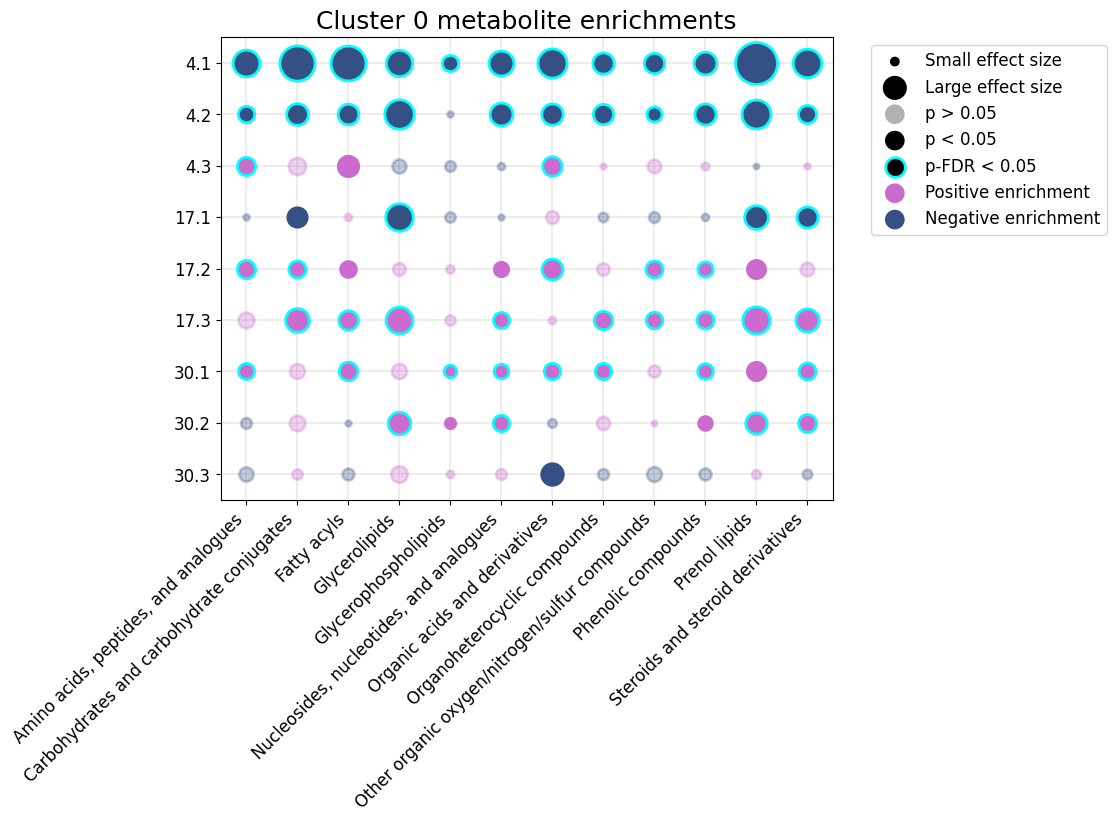

In [141]:
variable_to_test= 'temp-phase2'
output_dir = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats'
# Example usage:
enriched_results_num = test_numeric_enrichment(tss_subset_0_collapsed, cluster_column=variable_to_test)
print(enriched_results_num.sort_values(by='Corrected p-value').head(10))
enriched_results_num.to_csv(f'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats/20250521_enrichments_cluster0.csv', index=False)

# Define a manual order for clusters (y-axis) and features (x-axis)
manual_cluster_order = ['4.1', '4.2', '4.3', '17.1', '17.2', '17.3', '30.1', '30.2', '30.3']
#inverse the previous order:
manual_cluster_order = manual_cluster_order[::-1]
#manual_feature_order = ['Feature A', 'Feature B', 'Feature C', 'Feature D']  # Adjust as needed

# Call function with manual order
fig = plot_numeric_bubbles_with_annotations(
    enriched_results_num, 
    "Cluster 0 metabolite enrichments",
    cluster_order=manual_cluster_order, 
    #feature_order=manual_feature_order
)

# Export figure
fig.savefig("/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats/20250521_enrichments_cluster0.pdf", format="pdf", bbox_inches="tight")

# Show plot
fig.show()

                                           Feature Cluster  Statistic  \
53         Nucleosides, nucleotides, and analogues    30.3      498.0   
89                              Phenolic compounds    30.3      498.0   
80  Other organic oxygen/nitrogen/sulfur compounds    30.3      498.0   
71                    Organoheterocyclic compounds    30.3      498.0   
8             Amino acids, peptides, and analogues    30.3      498.0   
72  Other organic oxygen/nitrogen/sulfur compounds     4.1       11.0   
62                   Organic acids and derivatives    30.3      493.0   
0             Amino acids, peptides, and analogues     4.1       19.0   
81                              Phenolic compounds     4.1       27.0   
34                                   Glycerolipids    30.2      870.0   

     Raw p-value  Corrected p-value  Cluster Mean  Overall Mean  \
53  3.441707e-09       7.434087e-08      0.002368      0.001036   
89  3.441707e-09       7.434087e-08      0.010566      0.00563

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/2356194389.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


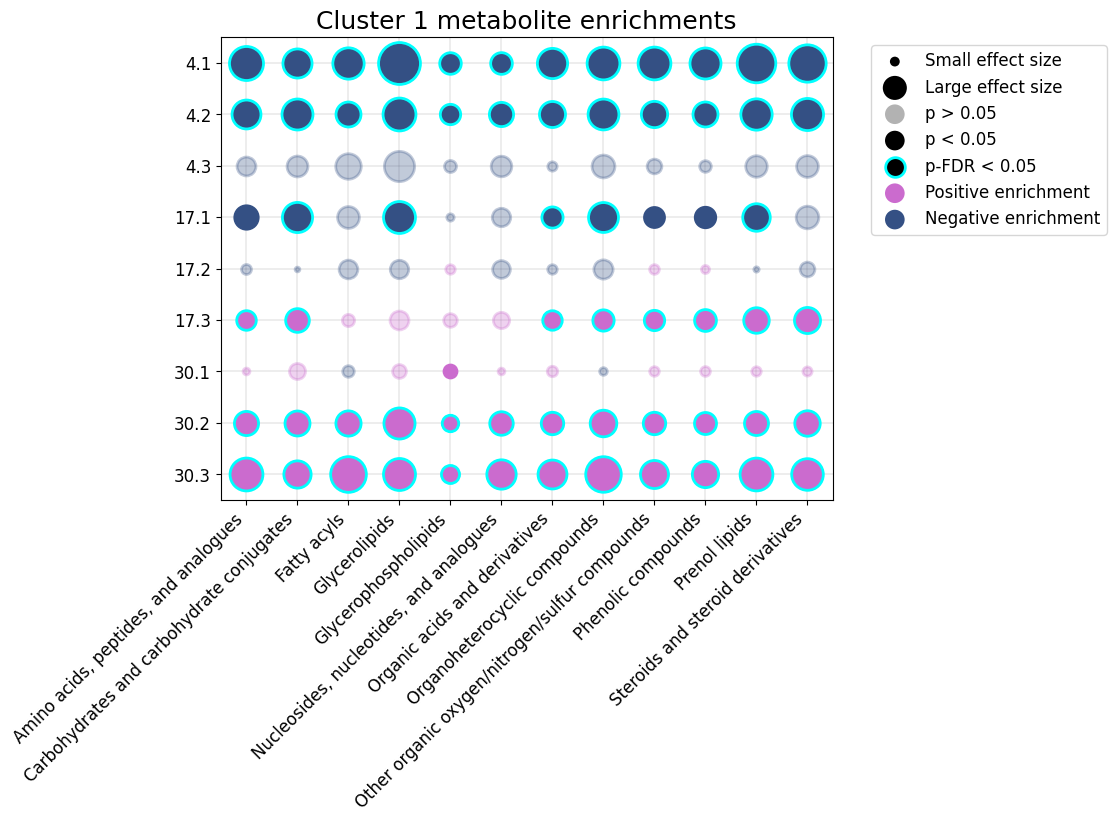

In [142]:
variable_to_test= 'temp-phase2'
output_dir = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats'
# Example usage:
enriched_results_num = test_numeric_enrichment(tss_subset_1_collapsed, cluster_column=variable_to_test)
print(enriched_results_num.sort_values(by='Corrected p-value').head(10))
enriched_results_num.to_csv(f'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats/20250521_enrichments_cluster1.csv', index=False)

# Define a manual order for clusters (y-axis) and features (x-axis)
manual_cluster_order = ['4.1', '4.2', '4.3', '17.1', '17.2', '17.3', '30.1', '30.2', '30.3']
#inverse the previous order:
manual_cluster_order = manual_cluster_order[::-1]
#manual_feature_order = ['Feature A', 'Feature B', 'Feature C', 'Feature D']  # Adjust as needed

# Call function with manual order
fig = plot_numeric_bubbles_with_annotations(
    enriched_results_num, 
    "Cluster 1 metabolite enrichments",
    cluster_order=manual_cluster_order, 
    #feature_order=manual_feature_order
)

# Export figure
fig.savefig("/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats/20250521_enrichments_cluster1.pdf", format="pdf", bbox_inches="tight")

# Show plot
fig.show()

                                      Feature Cluster  Statistic  \
17  Carbohydrates and carbohydrate conjugates    30.3        3.0   
35              Organic acids and derivatives    30.3        7.0   
63           Steroids and steroid derivatives     4.1      873.0   
62                         Phenolic compounds    30.3       12.0   
9   Carbohydrates and carbohydrate conjugates     4.1      871.0   
61                         Phenolic compounds    30.2       73.0   
8        Amino acids, peptides, and analogues    30.3       19.0   
18                              Glycerolipids     4.1      847.0   
55                         Phenolic compounds     4.2      843.0   
36               Organoheterocyclic compounds     4.1      839.0   

     Raw p-value  Corrected p-value  Cluster Mean  Overall Mean  \
17  2.409195e-08           0.000002      0.011421      0.051499   
35  1.514351e-07           0.000005      0.001417      0.005472   
63  8.175486e-07           0.000013      0.006549 

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/4261953910.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


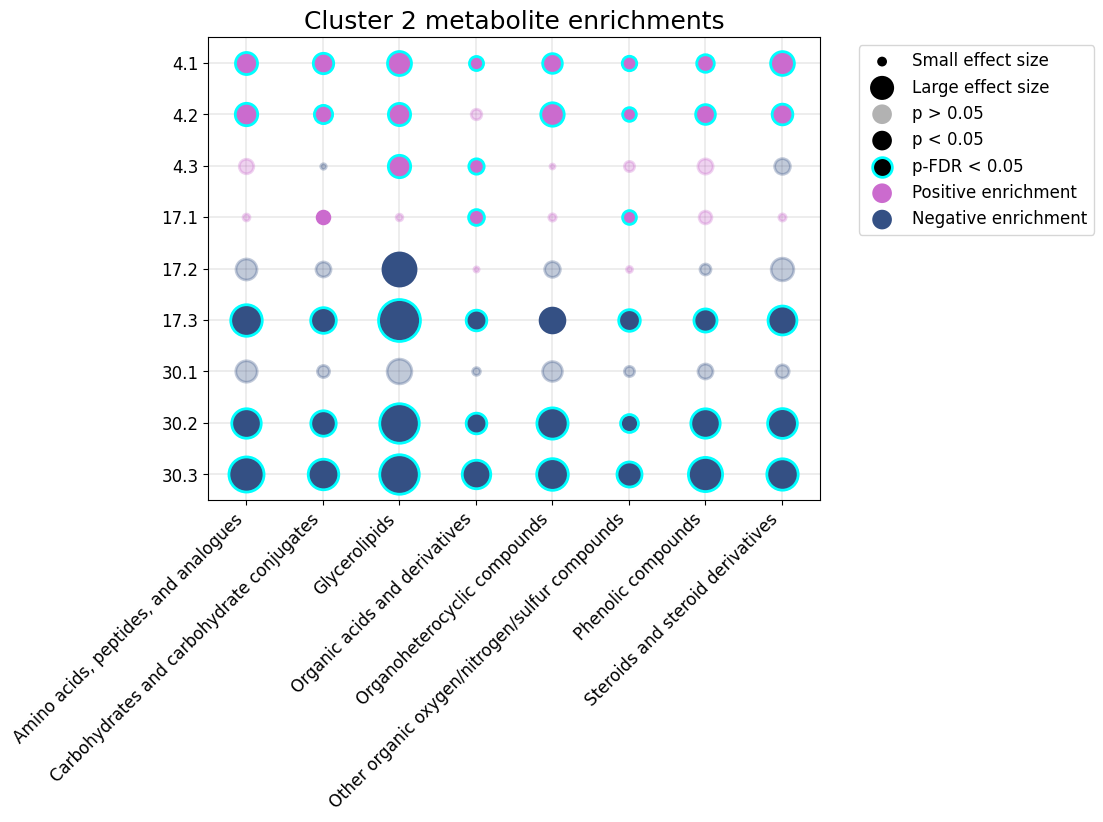

In [143]:
variable_to_test= 'temp-phase2'
output_dir = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats'
# Example usage:
enriched_results_num = test_numeric_enrichment(tss_subset_2_collapsed, cluster_column=variable_to_test)
print(enriched_results_num.sort_values(by='Corrected p-value').head(10))
enriched_results_num.to_csv(f'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats/20250521_enrichments_cluster2.csv', index=False)

# Define a manual order for clusters (y-axis) and features (x-axis)
manual_cluster_order = ['4.1', '4.2', '4.3', '17.1', '17.2', '17.3', '30.1', '30.2', '30.3']
#inverse the previous order:
manual_cluster_order = manual_cluster_order[::-1]
#manual_feature_order = ['Feature A', 'Feature B', 'Feature C', 'Feature D']  # Adjust as needed

# Call function with manual order
fig = plot_numeric_bubbles_with_annotations(
    enriched_results_num, 
    "Cluster 2 metabolite enrichments",
    cluster_order=manual_cluster_order, 
    #feature_order=manual_feature_order
)

# Export figure
fig.savefig("/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats/20250521_enrichments_cluster2.pdf", format="pdf", bbox_inches="tight")

# Show plot
fig.show()

                                           Feature Cluster  Statistic  \
53                    Organoheterocyclic compounds    30.3        0.0   
71                              Phenolic compounds    30.3        2.0   
62  Other organic oxygen/nitrogen/sulfur compounds    30.3        3.0   
8             Amino acids, peptides, and analogues    30.3        5.0   
63                              Phenolic compounds     4.1      886.0   
9        Carbohydrates and carbohydrate conjugates     4.1      852.0   
43                   Organic acids and derivatives    30.2       88.0   
70                              Phenolic compounds    30.2       96.0   
61  Other organic oxygen/nitrogen/sulfur compounds    30.2      100.0   
3             Amino acids, peptides, and analogues    17.1      772.0   

     Raw p-value  Corrected p-value  Cluster Mean  Overall Mean  \
53  3.441707e-09       3.097536e-07      0.013607      0.023216   
71  1.376683e-08       6.195073e-07      0.008158      0.01677

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/3780177446.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


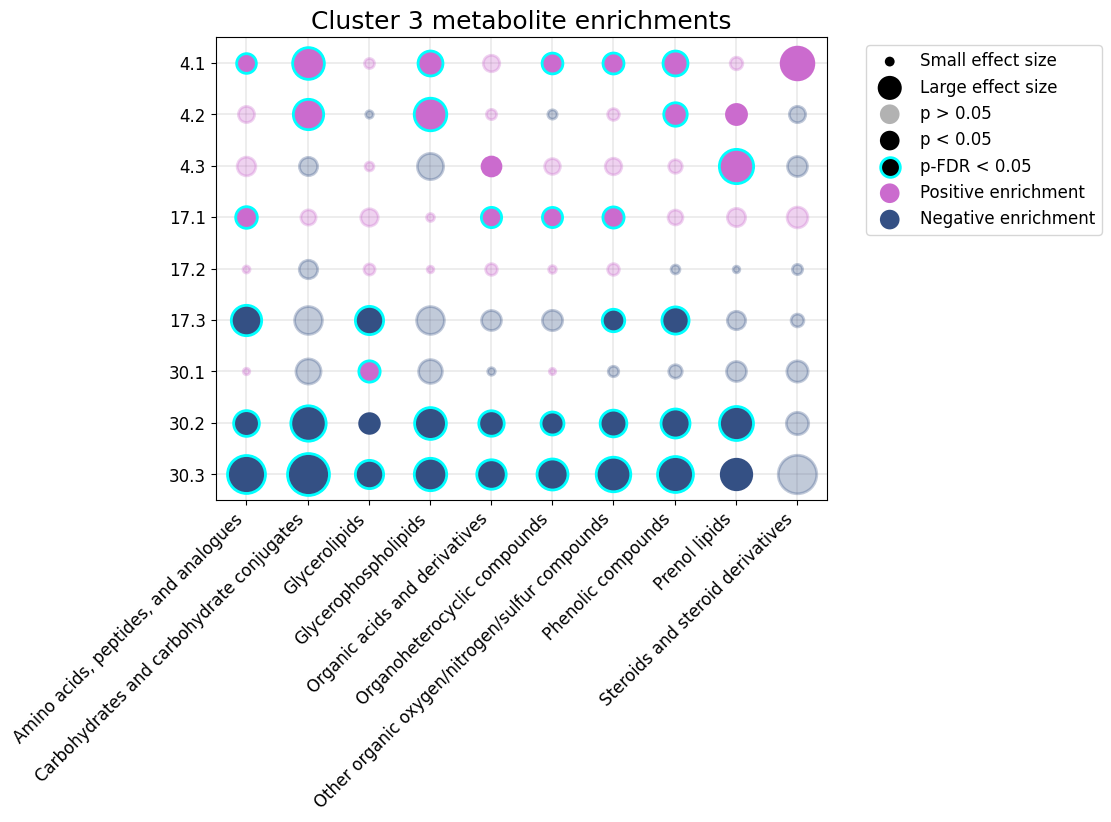

In [144]:
variable_to_test= 'temp-phase2'
output_dir = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats'
# Example usage:
enriched_results_num = test_numeric_enrichment(tss_subset_3_collapsed, cluster_column=variable_to_test)
print(enriched_results_num.sort_values(by='Corrected p-value').head(10))
enriched_results_num.to_csv(f'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats/20250521_enrichments_cluster3.csv', index=False)

# Define a manual order for clusters (y-axis) and features (x-axis)
manual_cluster_order = ['4.1', '4.2', '4.3', '17.1', '17.2', '17.3', '30.1', '30.2', '30.3']
#inverse the previous order:
manual_cluster_order = manual_cluster_order[::-1]
#manual_feature_order = ['Feature A', 'Feature B', 'Feature C', 'Feature D']  # Adjust as needed

# Call function with manual order
fig = plot_numeric_bubbles_with_annotations(
    enriched_results_num, 
    "Cluster 3 metabolite enrichments",
    cluster_order=manual_cluster_order, 
    #feature_order=manual_feature_order
)

# Export figure
fig.savefig("/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats/20250521_enrichments_cluster3.pdf", format="pdf", bbox_inches="tight")

# Show plot
fig.show()

In [114]:
tss0 = tss_subset_0_collapsed.drop(columns=['temp-phase2'])
#and then merge the temperature column form the metadata::
tss0 = tss0.merge(metadata[['temperature']], left_index=True, right_index=True, how='left')
tss0

,"Amino acids, peptides, and analogues",Carbohydrates and carbohydrate conjugates,Fatty acyls,Glycerolipids,Glycerophospholipids,"Nucleosides, nucleotides, and analogues",Organic acids and derivatives,Organoheterocyclic compounds,Other organic oxygen/nitrogen/sulfur compounds,Phenolic compounds,Prenol lipids,Steroids and steroid derivatives,temperature
366294_255-LP4-16S-0755,0.004364,0.000429,0.000818,0.000000,0.005158,0.011848,0.000000,0.001297,0.000666,0.004172,0.000747,0.000447,4
366294_237-LP4-16S-0737,0.007679,0.000889,0.000968,0.000492,0.004380,0.012855,0.000540,0.002034,0.001043,0.005750,0.000458,0.000563,4
366294_198-LP4-16S-0698,0.008487,0.000000,0.000987,0.000397,0.004167,0.014698,0.000000,0.001625,0.000919,0.005341,0.000520,0.000943,4
366294_240-LP4-16S-0740,0.010008,0.000000,0.001421,0.000000,0.005025,0.016470,0.000000,0.001976,0.001220,0.006597,0.000712,0.000000,4
366294_188-LP4-16S-0688,0.010639,0.001027,0.003697,0.000000,0.005534,0.017494,0.001003,0.002688,0.001356,0.006192,0.001583,0.001771,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_231-LP4-16S-0731,0.014185,0.002212,0.003734,0.001086,0.007971,0.030787,0.000492,0.003475,0.001918,0.010142,0.008646,0.003601,30
366294_196-LP4-16S-0696,0.012149,0.002268,0.004467,0.001093,0.007554,0.028757,0.000702,0.003199,0.001042,0.009270,0.010172,0.003083,30
366294_245-LP4-16S-0745,0.012049,0.002314,0.003198,0.000838,0.007443,0.030608,0.000881,0.003375,0.001154,0.009222,0.008001,0.002981,30
366294_252-LP4-16S-0752,0.013535,0.001770,0.003611,0.001001,0.007145,0.024314,0.000301,0.002574,0.001638,0.006612,0.005274,0.002606,30


In [118]:
tss1 = tss_subset_1_collapsed.drop(columns=['temp-phase2'])
#and then merge the temperature column form the metadata::
tss1 = tss1.merge(metadata[['temperature']], left_index=True, right_index=True, how='left')
tss1
tss2 = tss_subset_2_collapsed.drop(columns=['temp-phase2'])
#and then merge the temperature column form the metadata::
tss2 = tss2.merge(metadata[['temperature']], left_index=True, right_index=True, how='left')
tss2

,"Amino acids, peptides, and analogues",Carbohydrates and carbohydrate conjugates,Glycerolipids,Organic acids and derivatives,Organoheterocyclic compounds,Other organic oxygen/nitrogen/sulfur compounds,Phenolic compounds,Steroids and steroid derivatives,temperature
366294_255-LP4-16S-0755,0.041283,0.108364,0.018678,0.008255,0.002903,0.015057,0.009655,0.007943,4
366294_237-LP4-16S-0737,0.041416,0.100626,0.022261,0.008184,0.002293,0.014349,0.009839,0.007033,4
366294_198-LP4-16S-0698,0.046312,0.088903,0.025132,0.009351,0.002499,0.015650,0.009010,0.006074,4
366294_240-LP4-16S-0740,0.041625,0.092436,0.027273,0.009484,0.002308,0.017059,0.010646,0.005669,4
366294_188-LP4-16S-0688,0.032529,0.081016,0.026431,0.009005,0.001775,0.013843,0.009554,0.003918,4
...,...,...,...,...,...,...,...,...,...
366294_231-LP4-16S-0731,0.004649,0.018734,0.000594,0.002982,0.000291,0.006300,0.001444,0.000455,30
366294_196-LP4-16S-0696,0.002822,0.017546,0.000000,0.002469,0.000193,0.004777,0.001902,0.000592,30
366294_245-LP4-16S-0745,0.003947,0.014229,0.000472,0.002610,0.000000,0.005726,0.001022,0.000377,30
366294_252-LP4-16S-0752,0.001292,0.010978,0.000379,0.000705,0.000191,0.002797,0.000598,0.000618,30


In [115]:
df = tss0.copy()

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/1134979228.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = get_cmap('tab20', len(all_features))
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/1134979228.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


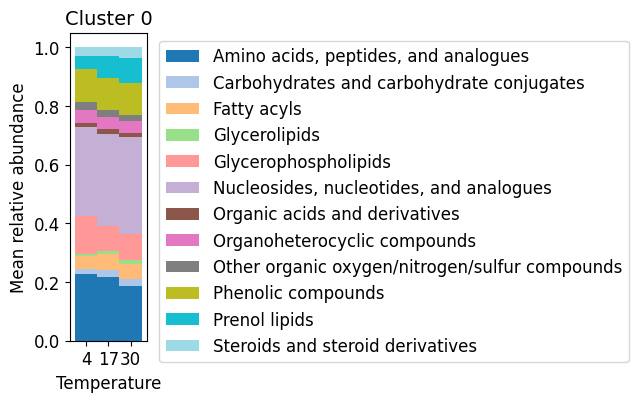

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors

# Step 1: Separate metadata and feature table
df = tss0.copy()
features = df.drop(columns='temperature')
temperature = df['temperature']

# Step 2: Create a color mapping for all features (fixed, stable across plots)
set_of_all_features_across_clusters = set(features.columns)
all_features = sorted(set_of_all_features_across_clusters)  # stable order
base_cmap = get_cmap('tab20', len(all_features))

color_mapping = {
    feature: mcolors.to_hex(base_cmap(i))
    for i, feature in enumerate(all_features)
}

# Step 3: Compute relative abundance per sample
features_rel = features.div(features.sum(axis=1), axis=0)

# Step 4: Add temperature back
features_rel['temperature'] = temperature

# Step 5: Compute mean abundance per feature per temperature
mean_abundance = features_rel.groupby('temperature').mean()

# Step 6: Get the color for each feature present in this subset
feature_order = mean_abundance.columns  # features present in this subset
feature_colors = [color_mapping[feature] for feature in feature_order]

# Step 7: Plot stacked barplot with stable coloring
mean_abundance[feature_order].plot(
    kind='bar',
    width=1,
    stacked=True,
    figsize=(1, 4),
    color=feature_colors
)

plt.ylabel('Mean relative abundance', fontsize=12)
plt.xlabel('Temperature', fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Cluster 0', fontsize=14)
plt.legend(
    bbox_to_anchor=(1.05, 1), loc='upper left',
    title='', fontsize=12, title_fontsize=12
)
plt.tight_layout()

# Save the figure
plt.savefig("/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats/20250521_metabolite_distribution_acros_cluster0.pdf", format="pdf", bbox_inches="tight")
plt.show()


/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/2917388190.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


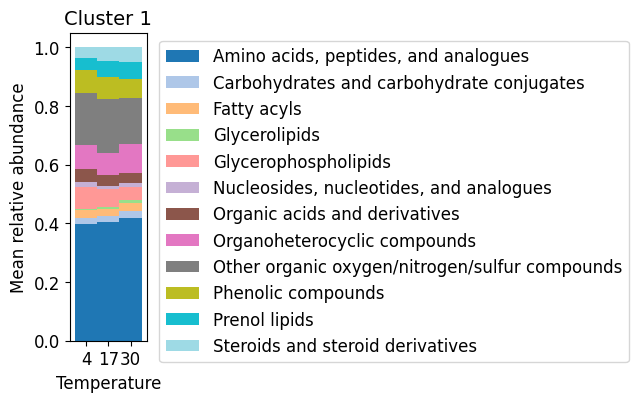

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors

# Step 1: Separate metadata and feature table
df = tss1.copy()
features = df.drop(columns='temperature')
temperature = df['temperature']

# Step 2: Create a color mapping for all features (fixed, stable across plots)
# set_of_all_features_across_clusters = set(features.columns)
# all_features = sorted(set_of_all_features_across_clusters)  # stable order
# base_cmap = get_cmap('tab20', len(all_features))

# color_mapping = {
#     feature: mcolors.to_hex(base_cmap(i))
#     for i, feature in enumerate(all_features)
# }

# Step 3: Compute relative abundance per sample
features_rel = features.div(features.sum(axis=1), axis=0)

# Step 4: Add temperature back
features_rel['temperature'] = temperature

# Step 5: Compute mean abundance per feature per temperature
mean_abundance = features_rel.groupby('temperature').mean()

# Step 6: Get the color for each feature present in this subset
feature_order = mean_abundance.columns  # features present in this subset
feature_colors = [color_mapping[feature] for feature in feature_order]

# Step 7: Plot stacked barplot with stable coloring
mean_abundance[feature_order].plot(
    kind='bar',
    width=1,
    stacked=True,
    figsize=(1, 4),
    color=feature_colors
)

plt.ylabel('Mean relative abundance', fontsize=12)
plt.xlabel('Temperature', fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Cluster 1', fontsize=14)
plt.legend(
    bbox_to_anchor=(1.05, 1), loc='upper left',
    title='', fontsize=12, title_fontsize=12
)
plt.tight_layout()
plt.savefig("/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats/20250521_metabolite_distribution_acros_cluster1.pdf", format="pdf", bbox_inches="tight")
plt.show()

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/3446569103.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


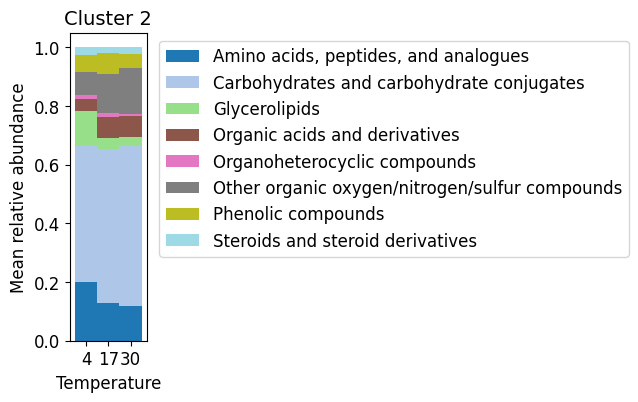

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors

# Step 1: Separate metadata and feature table
df = tss2.copy()
features = df.drop(columns='temperature')
temperature = df['temperature']

# Step 2: Create a color mapping for all features (fixed, stable across plots)
# set_of_all_features_across_clusters = set(features.columns)
# all_features = sorted(set_of_all_features_across_clusters)  # stable order
# base_cmap = get_cmap('tab20', len(all_features))

# color_mapping = {
#     feature: mcolors.to_hex(base_cmap(i))
#     for i, feature in enumerate(all_features)
# }

# Step 3: Compute relative abundance per sample
features_rel = features.div(features.sum(axis=1), axis=0)

# Step 4: Add temperature back
features_rel['temperature'] = temperature

# Step 5: Compute mean abundance per feature per temperature
mean_abundance = features_rel.groupby('temperature').mean()

# Step 6: Get the color for each feature present in this subset
feature_order = mean_abundance.columns  # features present in this subset
feature_colors = [color_mapping[feature] for feature in feature_order]

# Step 7: Plot stacked barplot with stable coloring
mean_abundance[feature_order].plot(
    kind='bar',
    width=1,
    stacked=True,
    figsize=(1, 4),
    color=feature_colors
)

plt.ylabel('Mean relative abundance', fontsize=12)
plt.xlabel('Temperature', fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Cluster 2', fontsize=14)
plt.legend(
    bbox_to_anchor=(1.05, 1), loc='upper left',
    title='', fontsize=12, title_fontsize=12
)
plt.tight_layout()
plt.savefig("/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA/stats/20250521_metabolite_distribution_acros_cluster2.pdf", format="pdf", bbox_inches="tight")
plt.show()

## last but not least, make some more correlation plots.. (numeric)

In [153]:
lang

,Column Name,mass,hmdb_accession,hmdb_name,formula,sourdough_class,class,sub_class,super_class,kingdom,...,tie_note,feature,cluster,kegg_mz_x,sample_mz_x,delta_mz_x,ppm_x,Compound_ID_x,Name_x,Chemical.Formula_x
0,M272.1614,272.1614,NaN,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,...,NaN,M272.1614,1,272.1619,272.161,0.0009,3.306855,C20279,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4
1,M149.0443,149.0443,HMDB0029398,(3-Nitroamino)alanine,C3H7N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,1 candidates,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M134.0459,134.0459,NaN,4-Hydroxy-L-threonine,NaN,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,...,NaN,M134.0459,1,134.0462,134.046,0.0002,1.492023,"C03059, C06056","2-Hydroxymethylserine, 4-Hydroxy-L-threonine","C4H9NO4, C4H9NO4"
3,M128.0339,128.0339,HMDB0032916,"4-Oxoproline, 5-Oxoproline",C6H8OS,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,6 candidates,M128.0339,1,128.0356,128.034,0.0016,12.496524,"C01877, C01879, C02237, C04281, C04282, C22141","4-Oxoproline, 5-Oxoproline, 5-Oxo-D-proline, L...","C5H7NO3, C5H7NO3, C5H7NO3, C5H7NO3, C5H7N..."
4,M413.1845,413.1845,HMDB0030401,AK toxin I,C23H27NO6,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,1 candidates,M413.1845,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,M487.3036,487.3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,M600.3885,600.3885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,M602.3878,602.3878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M602.3878,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,M650.4282,650.4282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M650.4282,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
#import this file: 20250516_fia_feature_table_tss:
tss = pd.read_csv('20250516_fia_feature_table_tss.csv', index_col=0)
tss
tss_all = tss.copy()

#for each of the tss_subsets, rename the column names based on 'sourdough_class' in the lang dataframe:
# Create a mapping from 'Column Name' to 'sourdough_class'
mapping = dict(zip(lang['Column Name'], lang['sourdough_class']))
# Rename the columns in each subset DataFrame
tss_all.rename(columns=mapping, inplace=True)
tss_all

#then collapse the columns so that all values from columns with the same name are summed:
# Collapse the columns by summing the values
tss_all_collapsed = tss_all.groupby(tss_all.columns, axis=1).sum()
tss_all_collapsed




/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/1410923934.py:15: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  tss_all_collapsed = tss_all.groupby(tss_all.columns, axis=1).sum()


,"Amino acids, peptides, and analogues",Carbohydrates and carbohydrate conjugates,Fatty acyls,Glycerolipids,Glycerophospholipids,"Nucleosides, nucleotides, and analogues",Organic acids and derivatives,Organoheterocyclic compounds,Other organic oxygen/nitrogen/sulfur compounds,Phenolic compounds,Prenol lipids,Steroids and steroid derivatives
366294_209-LP4-16S-0709,0.125141,0.131359,0.000919,0.007560,0.013555,0.005701,0.007078,0.023776,0.026367,0.032251,0.000000,0.009213
366294_255-LP4-16S-0755,0.192208,0.114073,0.000818,0.025275,0.010142,0.012672,0.012868,0.046311,0.024771,0.039316,0.002673,0.011481
366294_237-LP4-16S-0737,0.205316,0.107150,0.001821,0.026858,0.008595,0.013880,0.014785,0.046090,0.026976,0.040341,0.002351,0.009194
366294_198-LP4-16S-0698,0.212350,0.092024,0.001729,0.032823,0.007946,0.015393,0.014846,0.045256,0.027347,0.039336,0.003361,0.009158
366294_240-LP4-16S-0740,0.210633,0.096990,0.001421,0.031722,0.009937,0.017388,0.015374,0.034128,0.030072,0.042924,0.003993,0.007483
...,...,...,...,...,...,...,...,...,...,...,...,...
366294_231-LP4-16S-0731,0.151320,0.025757,0.007695,0.008565,0.014042,0.032377,0.010135,0.035392,0.031429,0.031865,0.016692,0.011453
366294_196-LP4-16S-0696,0.146111,0.024174,0.008049,0.009336,0.013076,0.030613,0.010717,0.036983,0.029898,0.030382,0.017718,0.012034
366294_245-LP4-16S-0745,0.152005,0.021079,0.008785,0.006526,0.013748,0.032588,0.010836,0.037023,0.032818,0.029127,0.019647,0.011297
366294_252-LP4-16S-0752,0.151362,0.017118,0.012367,0.008093,0.012649,0.026526,0.010787,0.043326,0.033245,0.026143,0.021471,0.011867


In [157]:
#import 20250515_fia_16S_ITS_shipping_general_metadata:
metadata = pd.read_csv('20250515_fia_16S_ITS_shipping_general_metadata.csv', index_col=0)
metadata

,Unnamed: 0,Chao1 kmers ITS,Chao1 OTUs ITS,Chao1 ASVs ITS,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,...,Evenness OTUs ITS,Simpson OTUs ITS,Shannon kmers ITS,Evenness kmers ITS,Simpson kmers ITS,Observed features FIA,Chao1 FIA,Shannon FIA,Simpson FIA,Evenness FIA
16S_id,,,,,,,,,,,,,,,,,,,,,
366294_217-LP4-16S-0717,366292_217-LP4-ITS-0717,1204.0,5.000000,8.00,588.000000,3.0,3.0,W04.02.01,E,6,...,0.107406,0.058532,8.480431,0.828683,0.996810,600.0,600.0,7.659309,0.982243,1.197341
366294_255-LP4-16S-0755,366292_255-LP4-ITS-0755,2285.0,15.000000,17.00,708.000000,5.0,5.0,W04.01.01,C,11,...,0.064754,0.053929,8.378933,0.750937,0.996693,471.0,471.0,7.455047,0.982054,1.211246
366294_251-LP4-16S-0751,366292_251-LP4-ITS-0751,3265.0,16.250000,34.00,708.000000,5.0,8.0,W04.03.01,G,10,...,0.071042,0.057944,8.393120,0.719028,0.996696,437.0,437.0,7.420627,0.981258,1.220511
366294_223-LP4-16S-0723,366292_223-LP4-ITS-0723,1953.0,11.333333,11.00,678.000000,3.0,5.0,W04.03.02,C,7,...,0.047115,0.032811,8.303357,0.759582,0.996632,702.0,702.0,7.751500,0.981927,1.182725
366294_177-LP4-16S-0677,366292_177-LP4-ITS-0677,1960.0,17.333333,19.00,473.004386,4.5,2.0,W04.02.02,E,1,...,0.056046,0.043449,8.305815,0.759449,0.996637,566.0,566.0,7.648832,0.980807,1.206708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_239-LP4-16S-0739,366292_239-LP4-ITS-0739,1536.0,5.000000,8.20,708.000000,5.0,5.0,W30.01.21,C,9,...,0.015633,0.006276,8.216056,0.776201,0.996566,958.0,958.0,9.007755,0.994265,1.312157
366294_173-LP4-16S-0673,366292_173-LP4-ITS-0673,2477.0,18.500000,18.75,718.000000,5.0,6.0,W30.02.21,A,1,...,0.064827,0.053488,8.357678,0.741298,0.996672,984.0,984.0,9.074795,0.994835,1.316786
366294_121-LP4-16S-0621,366292_121-LP4-ITS-0621,1052.0,4.000000,6.00,244.000000,1.0,1.0,W30.02.28,E,6,...,0.110319,0.056100,8.340575,0.830824,0.996682,NaN,NaN,NaN,NaN,NaN


In [158]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA'

In [160]:
#import also the 16S otu table:
otu_16S = pd.read_csv('/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/16S/OTUs/alpha_rarefaction/core-metrics-results-380/20250513_features_OTU_species_names.csv', index_col=0)
otu_16S

,Acetobacter cerevisiae,Lactobacillus sanfranciscensis,Pediococcus parvulus,Lactobacillus rossiae,Lactobacillus brevis
366294_118-LP4-16S-0618,11.0,318.0,4.0,37.0,10.0
366294_124-LP4-16S-0624,166.0,161.0,0.0,36.0,17.0
366294_128-LP4-16S-0628,244.0,44.0,10.0,38.0,42.0
366294_130-LP4-16S-0630,132.0,195.0,5.0,29.0,19.0
366294_132-LP4-16S-0632,8.0,300.0,5.0,56.0,11.0
...,...,...,...,...,...
366294_263-LP4-16S-0763,9.0,233.0,1.0,120.0,17.0
366294_264-LP4-16S-0764,4.0,339.0,2.0,31.0,4.0
366294_265-LP4-16S-0765,8.0,204.0,17.0,124.0,25.0
366294_266-LP4-16S-0766,5.0,172.0,25.0,147.0,31.0


In [189]:
otu_16S_rel = pd.read_csv('/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/16S/OTUs/alpha_rarefaction/core-metrics-results-380/20250513_relative_features_OTU_species_names.csv', index_col=0)
otu_16S_rel

,Acetobacter cerevisiae,Lactobacillus sanfranciscensis,Pediococcus parvulus,Lactobacillus rossiae,Lactobacillus brevis
366294_118-LP4-16S-0618,0.028947,0.836842,0.010526,0.097368,0.026316
366294_124-LP4-16S-0624,0.436842,0.423684,0.000000,0.094737,0.044737
366294_128-LP4-16S-0628,0.645503,0.116402,0.026455,0.100529,0.111111
366294_130-LP4-16S-0630,0.347368,0.513158,0.013158,0.076316,0.050000
366294_132-LP4-16S-0632,0.021053,0.789474,0.013158,0.147368,0.028947
...,...,...,...,...,...
366294_263-LP4-16S-0763,0.023684,0.613158,0.002632,0.315789,0.044737
366294_264-LP4-16S-0764,0.010526,0.892105,0.005263,0.081579,0.010526
366294_265-LP4-16S-0765,0.021164,0.539683,0.044974,0.328042,0.066138
366294_266-LP4-16S-0766,0.013158,0.452632,0.065789,0.386842,0.081579


In [190]:
# Make copies and sanitize feature names
otu_df = otu_16S.copy()
otu_df_rel = otu_16S_rel.copy()
metab_df = tss_all_collapsed.copy()

otu_df.columns = otu_df.columns.str.replace(' ', '_')
otu_df_rel.columns = otu_df_rel.columns.str.replace(' ', '_')
metab_df.columns = metab_df.columns.str.replace(' ', '_')

# Retain only shared sample IDs (indexes)
shared_samples = otu_df.index.intersection(metab_df.index)
otu_df = otu_df.loc[shared_samples]
otu_df_rel = otu_df_rel.loc[shared_samples]
metab_df = metab_df.loc[shared_samples]



In [191]:
otu_df_rel

,Acetobacter_cerevisiae,Lactobacillus_sanfranciscensis,Pediococcus_parvulus,Lactobacillus_rossiae,Lactobacillus_brevis
366294_173-LP4-16S-0673,0.106383,0.369681,0.029255,0.063830,0.430851
366294_174-LP4-16S-0674,0.007895,0.976316,0.005263,0.010526,0.000000
366294_175-LP4-16S-0675,0.010526,0.984211,0.000000,0.002632,0.002632
366294_176-LP4-16S-0676,0.789474,0.139474,0.060526,0.002632,0.007895
366294_177-LP4-16S-0677,0.002632,0.989474,0.005263,0.002632,0.000000
...,...,...,...,...,...
366294_263-LP4-16S-0763,0.023684,0.613158,0.002632,0.315789,0.044737
366294_264-LP4-16S-0764,0.010526,0.892105,0.005263,0.081579,0.010526
366294_265-LP4-16S-0765,0.021164,0.539683,0.044974,0.328042,0.066138
366294_266-LP4-16S-0766,0.013158,0.452632,0.065789,0.386842,0.081579


In [195]:
metab_df

,"Amino_acids,_peptides,_and_analogues",Carbohydrates_and_carbohydrate_conjugates,Fatty_acyls,Glycerolipids,Glycerophospholipids,"Nucleosides,_nucleotides,_and_analogues",Organic_acids_and_derivatives,Organoheterocyclic_compounds,Other_organic_oxygen/nitrogen/sulfur_compounds,Phenolic_compounds,Prenol_lipids,Steroids_and_steroid_derivatives
366294_173-LP4-16S-0673,0.159969,0.017341,0.009755,0.009047,0.014367,0.025615,0.009227,0.036797,0.031805,0.026870,0.019693,0.015140
366294_174-LP4-16S-0674,0.194194,0.069160,0.005730,0.023660,0.010880,0.019965,0.014188,0.037720,0.025426,0.038526,0.006617,0.007158
366294_175-LP4-16S-0675,0.193528,0.102089,0.004065,0.025162,0.010017,0.015889,0.011727,0.035249,0.022340,0.038548,0.003980,0.010720
366294_176-LP4-16S-0676,0.146453,0.020541,0.007582,0.007145,0.012347,0.030907,0.010775,0.040329,0.034539,0.027787,0.016290,0.010959
366294_177-LP4-16S-0677,0.199490,0.104323,0.001958,0.031178,0.010127,0.013495,0.011446,0.032315,0.024935,0.039353,0.004301,0.010209
...,...,...,...,...,...,...,...,...,...,...,...,...
366294_263-LP4-16S-0763,0.161181,0.038728,0.007843,0.012990,0.013631,0.027060,0.011774,0.037129,0.027215,0.036435,0.017327,0.009212
366294_264-LP4-16S-0764,0.207336,0.093766,0.002257,0.030133,0.011735,0.017701,0.018254,0.037449,0.027792,0.041214,0.001241,0.007002
366294_265-LP4-16S-0765,0.165068,0.028935,0.005701,0.008382,0.013832,0.032352,0.012662,0.033182,0.033610,0.030797,0.017151,0.010252
366294_266-LP4-16S-0766,0.167090,0.041416,0.006516,0.012642,0.013740,0.029633,0.011948,0.035463,0.028704,0.035225,0.016423,0.010138


#then export as biom tables:

In [168]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/FIA'

In [173]:
from biom import Table
import biom

# Microbial table
otu_table = Table(otu_df.values.T, observation_ids=otu_df.columns, sample_ids=otu_df.index)
with biom.util.biom_open("microbes.biom", "w") as f:
    otu_table.to_hdf5(f, "Generated by Annina")

# Metabolite table
metab_table = Table(metab_df.values.T, observation_ids=metab_df.columns, sample_ids=metab_df.index)
with biom.util.biom_open("metabolites.biom", "w") as f:
    metab_table.to_hdf5(f, "Generated by Annina")



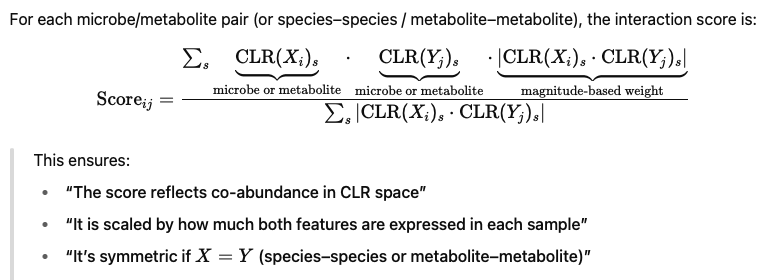

In [ ]:
#matrices:

otu_df_rel
metab_df

In [196]:
import pandas as pd
import numpy as np
from skbio.stats.composition import multiplicative_replacement, clr

def prepare_clr(df, delta=1e-8, tss=False):
    """Apply multiplicative replacement and CLR transform."""
    if tss:
        df = df.div(df.sum(axis=1), axis=0)
    mat = multiplicative_replacement(df.values, delta=delta)
    return pd.DataFrame(clr(mat), index=df.index, columns=df.columns)

In [197]:
# Apply to your actual data
microbe_clr = prepare_clr(otu_df_rel, tss=False)     # already relative?
metab_clr   = prepare_clr(metab_df, tss=True)        # raw metabolite intensities

In [199]:
microbe_clr

,Acetobacter_cerevisiae,Lactobacillus_sanfranciscensis,Pediococcus_parvulus,Lactobacillus_rossiae,Lactobacillus_brevis
366294_173-LP4-16S-0673,-0.168500,1.077094,-1.459484,-0.679326,1.230217
366294_174-LP4-16S-0674,1.775863,6.593453,1.370398,2.063545,-11.803259
366294_175-LP4-16S-0675,2.420286,6.958248,-11.446518,1.033992,1.033992
366294_176-LP4-16S-0676,2.922146,1.188656,0.353858,-2.781636,-1.683024
366294_177-LP4-16S-0677,1.171555,7.101144,1.864702,1.171555,-11.308955
...,...,...,...,...,...
366294_263-LP4-16S-0763,-0.856569,2.397245,-3.053794,1.733698,-0.220580
366294_264-LP4-16S-0764,-1.158850,3.280855,-1.851997,0.888843,-1.158850
366294_265-LP4-16S-0765,-1.574545,1.664134,-0.820773,1.166295,-0.435111
366294_266-LP4-16S-0766,-2.070608,1.467449,-0.461170,1.310387,-0.246058


In [198]:
def clr_abundance_weighted_interaction_matrix(A_clr, B_clr, threshold=0):
    """
    Computes fully abundance-weighted CLR-based co-occurrence between A and B.
    Returns: matrix (rows=A.columns, cols=B.columns)
    """
    result = pd.DataFrame(index=A_clr.columns, columns=B_clr.columns)

    for a in A_clr.columns:
        for b in B_clr.columns:
            x = A_clr[a]
            y = B_clr[b]

            # Compute abundance-weighted product
            joint_weight = x * y

            # Optional: filter small contributions
            joint_weight[abs(x) < threshold] = 0
            joint_weight[abs(y) < threshold] = 0

            weights = abs(joint_weight)
            numerator = (x * y * weights).sum()
            denominator = weights.sum()

            result.loc[a, b] = numerator / denominator if denominator > 0 else 0

    return result.astype(float)


-> threshold removes sampels with absolute clr smaller than threshold before calculating correlations

In [200]:
# Microbe–Microbe co-occurrence
microbe_matrix = clr_abundance_weighted_interaction_matrix(microbe_clr, microbe_clr, threshold=0)

# Metabolite–Metabolite co-occurrence
metab_matrix = clr_abundance_weighted_interaction_matrix(metab_clr, metab_clr, threshold=0)

# Microbe–Metabolite directional interaction
cross_matrix = clr_abundance_weighted_interaction_matrix(microbe_clr, metab_clr, threshold=0)


In [202]:
# shape = species (rows) × metabolites (columns)
interaction_matrix = cross_matrix
microbe_abund = otu_df_rel.mean()      # mean relative abundance per microbe
metabolite_abund = metab_df.mean()     # mean relative abundance per metabolite


In [203]:
metabolite_abund

Amino_acids,_peptides,_and_analogues              0.176797
Carbohydrates_and_carbohydrate_conjugates         0.058702
Fatty_acyls                                       0.006080
Glycerolipids                                     0.016258
Glycerophospholipids                              0.012290
Nucleosides,_nucleotides,_and_analogues           0.024002
Organic_acids_and_derivatives                     0.012593
Organoheterocyclic_compounds                      0.035110
Other_organic_oxygen/nitrogen/sulfur_compounds    0.029273
Phenolic_compounds                                0.036526
Prenol_lipids                                     0.011347
Steroids_and_steroid_derivatives                  0.009389
dtype: float64

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/1129048761.py:52: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/1129048761.py:52: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(


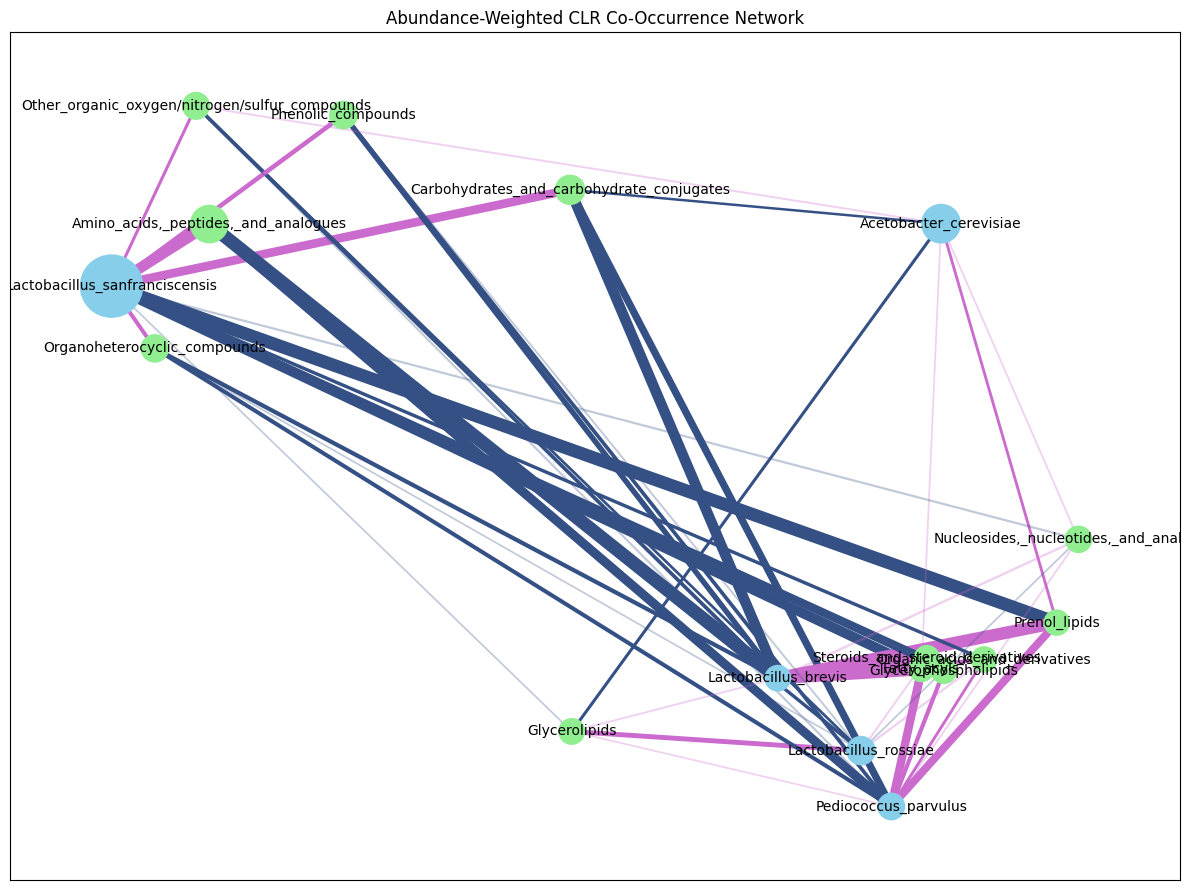

In [206]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Reshape and filter matrix
edges = interaction_matrix.stack().reset_index()
edges.columns = ['Microbe', 'Metabolite', 'Score']
edges_filtered = edges[edges['Score'].abs() >= 0.5]  # adjust threshold as needed

# Step 2: Build graph
G = nx.Graph()
for _, row in edges_filtered.iterrows():
    G.add_edge(row['Microbe'], row['Metabolite'], weight=row['Score'])

# Step 3: Set node types
microbes = interaction_matrix.index.tolist()
metabolites = interaction_matrix.columns.tolist()

# Step 4: Node colors and sizes
node_colors = []
node_sizes = []
for node in G.nodes:
    if node in microbes:
        node_colors.append('skyblue')
        node_sizes.append(microbe_abund.get(node, 1))
    else:
        node_colors.append('lightgreen')
        node_sizes.append(metabolite_abund.get(node, 1))

# Scale node sizes
node_sizes = [300 + (s / max(node_sizes)) * 1700 for s in node_sizes]

# Step 5: Edge style (color, width, alpha)
edge_colors = []
edge_weights = []
edge_alphas = []

for u, v, d in G.edges(data=True):
    val = d['weight']
    edge_colors.append('#CB6BCEFF' if val > 0 else '#345084FF')
    edge_weights.append(1 + 0.5 * abs(val))  # scale linearly
    edge_alphas.append(1.0 if abs(val) >= 1.5 else 0.3)

# Step 6: Plot
plt.figure(figsize=(12, 9))
pos = nx.spring_layout(G, seed=42)

# Draw edges in alpha layers
for alpha in [1.0, 0.3]:
    edges_subset = [(u, v) for (u, v), a in zip(G.edges(), edge_alphas) if a == alpha]
    ec_subset = [c for c, a in zip(edge_colors, edge_alphas) if a == alpha]
    ew_subset = [w for w, a in zip(edge_weights, edge_alphas) if a == alpha]
    nx.draw_networkx_edges(
        G, pos,
        edgelist=edges_subset,
        edge_color=ec_subset,
        width=ew_subset,
        alpha=alpha
    )

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Abundance-Weighted CLR Co-Occurrence Network")
plt.tight_layout()
plt.show()


In [208]:
microbe_microbe_matrix =   microbe_matrix.copy()      # pd.DataFrame (species × species)
metabolite_metabolite_matrix = metab_matrix.copy() # pd.DataFrame (metab × metab)
microbe_metabolite_matrix  = cross_matrix.copy()   # pd.DataFrame (species × metabolites)

microbe_abund = otu_df_rel.mean()
metabolite_abund = metab_df.mean()


/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/3048843081.py:87: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=subset_edges, edge_color=ec_subset, width=ew_subset, alpha=alpha)
/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_13470/3048843081.py:87: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=subset_edges, edge_color=ec_subset, width=ew_subset, alpha=alpha)


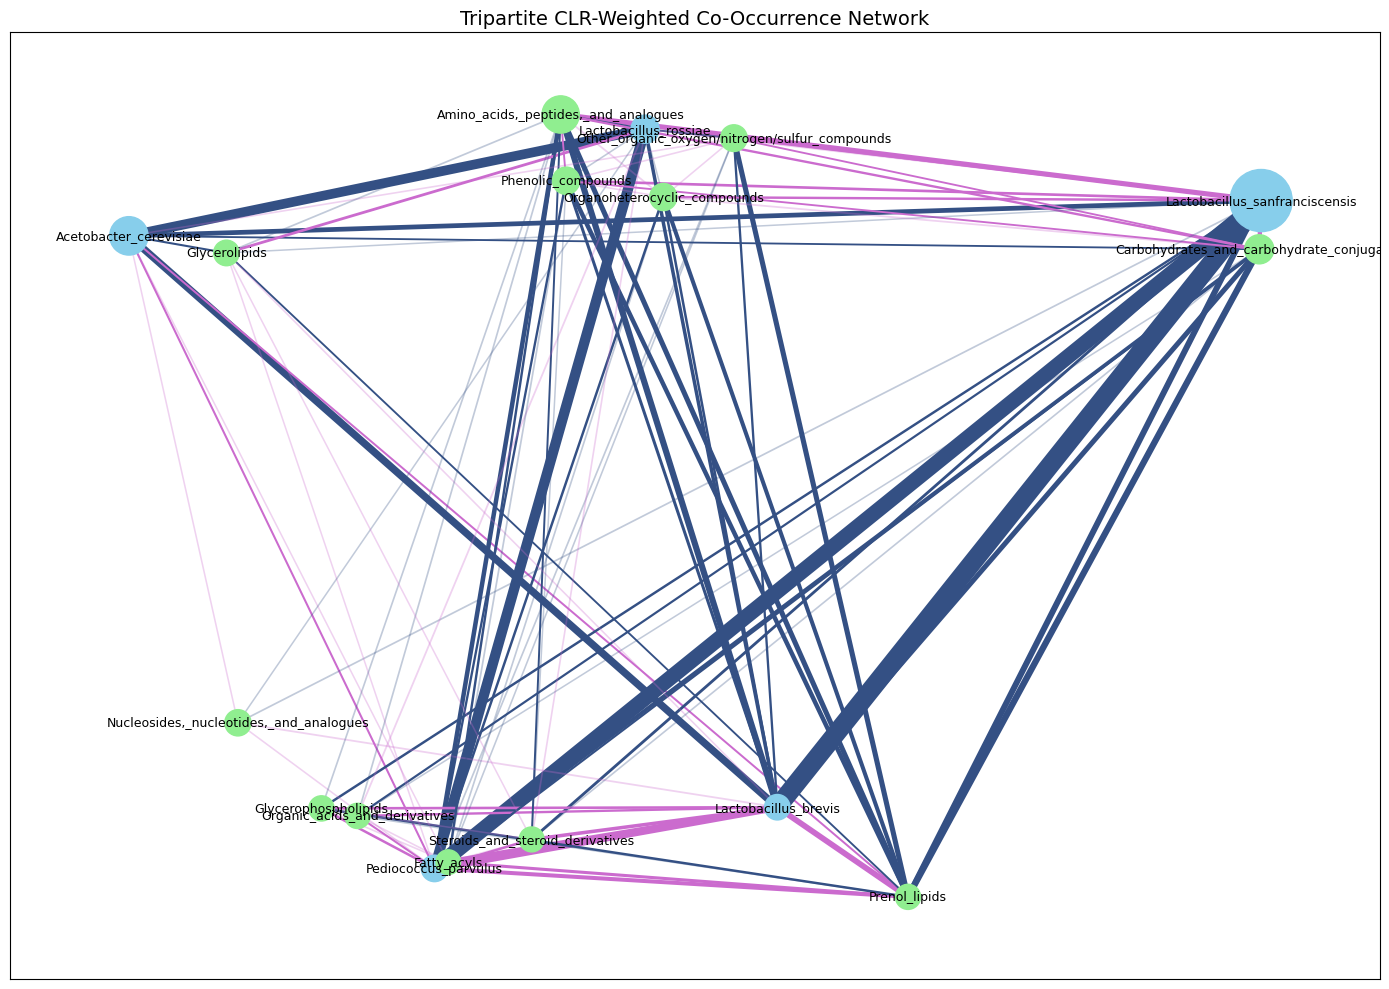

In [210]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Threshold to display edges
THRESHOLD = 0.5

# INPUTS:
# microbe_microbe_matrix : DataFrame (symmetric)
# metabolite_metabolite_matrix : DataFrame (symmetric)
# microbe_metabolite_matrix : DataFrame (rows=microbes, cols=metabolites)
# microbe_abund : mean abundance (Series)
# metabolite_abund : mean abundance (Series)

# Build unified edge list
edges_all = []

# Microbe–Microbe edges
for i in microbe_microbe_matrix.index:
    for j in microbe_microbe_matrix.columns:
        if i < j:  # avoid duplicates
            score = microbe_microbe_matrix.loc[i, j]
            if abs(score) >= THRESHOLD:
                edges_all.append((i, j, score))

# Metabolite–Metabolite edges
for i in metabolite_metabolite_matrix.index:
    for j in metabolite_metabolite_matrix.columns:
        if i < j:
            score = metabolite_metabolite_matrix.loc[i, j]
            if abs(score) >= THRESHOLD:
                edges_all.append((i, j, score))

# Microbe–Metabolite edges
for i in microbe_metabolite_matrix.index:
    for j in microbe_metabolite_matrix.columns:
        score = microbe_metabolite_matrix.loc[i, j]
        if abs(score) >= THRESHOLD:
            edges_all.append((i, j, score))

# Build graph
G = nx.Graph()
for u, v, score in edges_all:
    G.add_edge(u, v, weight=score)

# Node types
microbes = microbe_microbe_matrix.index.tolist()
metabolites = metabolite_metabolite_matrix.index.tolist()

# Node colors and sizes
node_colors = []
node_sizes = []
for node in G.nodes:
    if node in microbes:
        node_colors.append('skyblue')
        node_sizes.append(microbe_abund.get(node, 1))
    elif node in metabolites:
        node_colors.append('lightgreen')
        node_sizes.append(metabolite_abund.get(node, 1))
    else:
        node_colors.append('gray')
        node_sizes.append(100)

# Rescale sizes
node_sizes = [300 + (s / max(node_sizes)) * 1700 for s in node_sizes]

# Edge styles
edge_colors = []
edge_weights = []
edge_alphas = []
for u, v, d in G.edges(data=True):
    val = d['weight']
    edge_colors.append('#CB6BCEFF' if val > 0 else '#345084FF')
    edge_weights.append(1 + 0.2 * abs(val))
    edge_alphas.append(1.0 if abs(val) >= 1.5 else 0.3)

# Plot
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)

# Draw edges by alpha
for alpha in [1.0, 0.3]:
    subset_edges = [(u, v) for (u, v), a in zip(G.edges(), edge_alphas) if a == alpha]
    ec_subset = [c for c, a in zip(edge_colors, edge_alphas) if a == alpha]
    ew_subset = [w for w, a in zip(edge_weights, edge_alphas) if a == alpha]
    nx.draw_networkx_edges(G, pos, edgelist=subset_edges, edge_color=ec_subset, width=ew_subset, alpha=alpha)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos, font_size=9)

plt.title("Tripartite CLR-Weighted Co-Occurrence Network", fontsize=14)
plt.tight_layout()
plt.show()


In [212]:
! pip install pygraphviz


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [100 lines of output]
      /private/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/pip-build-env-ha2pnydc/overlay/lib/python3.10/site-packages/setuptools/config/_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
      
              By 2026-Feb-18, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      

In [150]:
! pip install networkx

In [151]:
! pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Apply to your actual data
microbe_clr = prepare_clr(otu_df_rel, tss=False)     # already relative?
metab_clr   = prepare_clr(metab_df, tss=True)  

# Microbe–Microbe co-occurrence
microbe_matrix = clr_abundance_weighted_interaction_matrix(microbe_clr, microbe_clr, threshold=0)

# Metabolite–Metabolite co-occurrence
metab_matrix = clr_abundance_weighted_interaction_matrix(metab_clr, metab_clr, threshold=0)

# Microbe–Metabolite directional interaction
cross_matrix = clr_abundance_weighted_interaction_matrix(microbe_clr, metab_clr, threshold=0)

# shape = species (rows) × metabolites (columns)
interaction_matrix = cross_matrix
microbe_abund = otu_df_rel.mean()      # mean relative abundance per microbe
metabolite_abund = metab_df.mean()     # mean relative abundance per metabolite

microbe_microbe_matrix =   microbe_matrix.copy()      # pd.DataFrame (species × species)
metabolite_metabolite_matrix = metab_matrix.copy() # pd.DataFrame (metab × metab)
microbe_metabolite_matrix  = cross_matrix.copy()   # pd.DataFrame (species × metabolites)

microbe_abund = otu_df_rel.mean()
metabolite_abund = metab_df.mean()